# **Malware Detection System**
# Malware is one of the most common cyberattacks, and its prevalence continues to increase daily across various networks. Unlike benign traffic, which tends to be symmetrical, malware traffic is characteristically asymmetrical. This distinct pattern is one of the key indicators used to identify malicious activities within a network. The rising occurrence of malware poses significant challenges to cybersecurity, making it imperative to develop robust detection and prevention mechanisms.

# **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/data (1).csv')

Mounted at /content/drive


# **Understanding Dataset**

In [ ]:
df

hash  millisecond  \
0      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0   
1      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1   
2      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2   
3      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3   
4      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4   
...                                                  ...          ...   
99995  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...          995   
99996  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...          996   
99997  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...          997   
99998  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...          998   
99999  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...          999   

      classification  state  usage_counter        prio  static_prio  \
0            malware      0              0  3069378560        14274   
1            malware      0              0  3069378560        14274   
2            malware      0              0  3069378560        14274   
3            malware      0              0  3069378560        14274   
4            malware      0              0  3069378560        14274   
...              ...    ...            ...         ...          ...   
99995        malware   4096              0  3070148608        13988   
99996        malware   4096              0  3070148608        13988   
99997        malware   4096              0  3070148608        13988   
99998        malware   4096              0  3070148608        13988   
99999        malware   4096              0  3070148608        13988   

       normal_prio  policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  \
0                0       0         0  ...       0        0      120   
1                0       0         0  ...       0        0      120   
2                0       0         0  ...       0        0      120   
3                0       0         0  ...       0        0      120   
4                0       0         0  ...       0        0      120   
...            ...     ...       ...  ...     ...      ...      ...   
99995            0       0         0  ...       2        1      120   
99996            0       0         0  ...       2        1      120   
99997            0       0         0  ...       2        1      120   
99998            0       0         0  ...       2        1      120   
99999            0       0         0  ...       2        1      120   

       fs_excl_counter        lock   utime  stime  gtime  cgtime  signal_nvcsw  
0                    0  3204448256  380690      4      0       0             0  
1                    0  3204448256  380690      4      0       0             0  
2                    0  3204448256  380690      4      0       0             0  
3                    0  3204448256  380690      4      0       0             0  
4                    0  3204448256  380690      4      0       0             0  
...                ...         ...     ...    ...    ...     ...           ...  
99995                0  3204448256  371979      3      0       0             0  
99996                0  3204448256  371979      3      0       0             0  
99997                0  3204448256  371979      3      0       0             0  
99998                0  3204448256  371979      3      0       0             0  
99999                0  3204448256  371979      3      0       0             0  

[100000 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [ ]:
df.shape

(100000, 35)

In [ ]:
df.isna().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [ ]:
df['classification'].value_counts()

classification
malware    50000
benign     50000
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='classification', ylabel='count'>

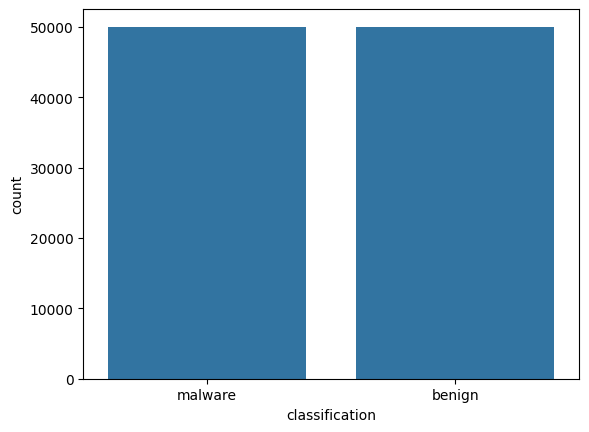

In [ ]:
sns.countplot(x='classification',data=df)

In [ ]:
df.describe(include="all")

hash    millisecond  \
count                                              100000  100000.000000   
unique                                                100            NaN   
top     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            NaN   
freq                                                 1000            NaN   
mean                                                  NaN     499.500000   
std                                                   NaN     288.676434   
min                                                   NaN       0.000000   
25%                                                   NaN     249.750000   
50%                                                   NaN     499.500000   
75%                                                   NaN     749.250000   
max                                                   NaN     999.000000   

       classification         state  usage_counter          prio  \
count          100000  1.000000e+05       100000.0  1.000000e+05   
unique              2           NaN            NaN           NaN   
top           malware           NaN            NaN           NaN   
freq            50000           NaN            NaN           NaN   
mean              NaN  1.577683e+05            0.0  3.069706e+09   
std               NaN  9.361726e+05            0.0  2.963061e+05   
min               NaN  0.000000e+00            0.0  3.069190e+09   
25%               NaN  0.000000e+00            0.0  3.069446e+09   
50%               NaN  0.000000e+00            0.0  3.069698e+09   
75%               NaN  4.096000e+03            0.0  3.069957e+09   
max               NaN  4.326605e+07            0.0  3.070222e+09   

          static_prio  normal_prio    policy  vm_pgoff  ...         nivcsw  \
count   100000.000000     100000.0  100000.0  100000.0  ...  100000.000000   
unique            NaN          NaN       NaN       NaN  ...            NaN   
top               NaN          NaN       NaN       NaN  ...            NaN   
freq              NaN          NaN       NaN       NaN  ...            NaN   
mean     18183.900070          0.0       0.0       0.0  ...      32.991160   
std       4609.792765          0.0       0.0       0.0  ...      52.730176   
min      13988.000000          0.0       0.0       0.0  ...       0.000000   
25%      14352.000000          0.0       0.0       0.0  ...       1.000000   
50%      16159.000000          0.0       0.0       0.0  ...       9.000000   
75%      22182.000000          0.0       0.0       0.0  ...      46.000000   
max      31855.000000          0.0       0.0       0.0  ...     365.000000   

              min_flt        maj_flt  fs_excl_counter          lock  \
count   100000.000000  100000.000000    100000.000000  1.000000e+05   
unique            NaN            NaN              NaN           NaN   
top               NaN            NaN              NaN           NaN   
freq              NaN            NaN              NaN           NaN   
mean         2.053130     117.920240         1.109190  3.204448e+09   
std         13.881382       3.116892         2.160466  0.000000e+00   
min          0.000000     112.000000         0.000000  3.204448e+09   
25%          0.000000     114.000000         0.000000  3.204448e+09   
50%          1.000000     120.000000         0.000000  3.204448e+09   
75%          1.000000     120.000000         1.000000  3.204448e+09   
max        256.000000     120.000000        18.000000  3.204448e+09   

                utime          stime         gtime    cgtime  signal_nvcsw  
count   100000.000000  100000.000000  100000.00000  100000.0      100000.0  
unique            NaN            NaN           NaN       NaN           NaN  
top               NaN            NaN           NaN       NaN           NaN  
freq              NaN            NaN           NaN       NaN           NaN  
mean    385415.451970       4.059310       1.66142       0.0           0.0  
std      10144.036494       0.822848       3.26304       0.0           

In [ ]:
df.describe(include='object')

hash classification
count                                              100000         100000
unique                                                100              2
top     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware
freq                                                 1000          50000

# **Some Plots to get more insights**

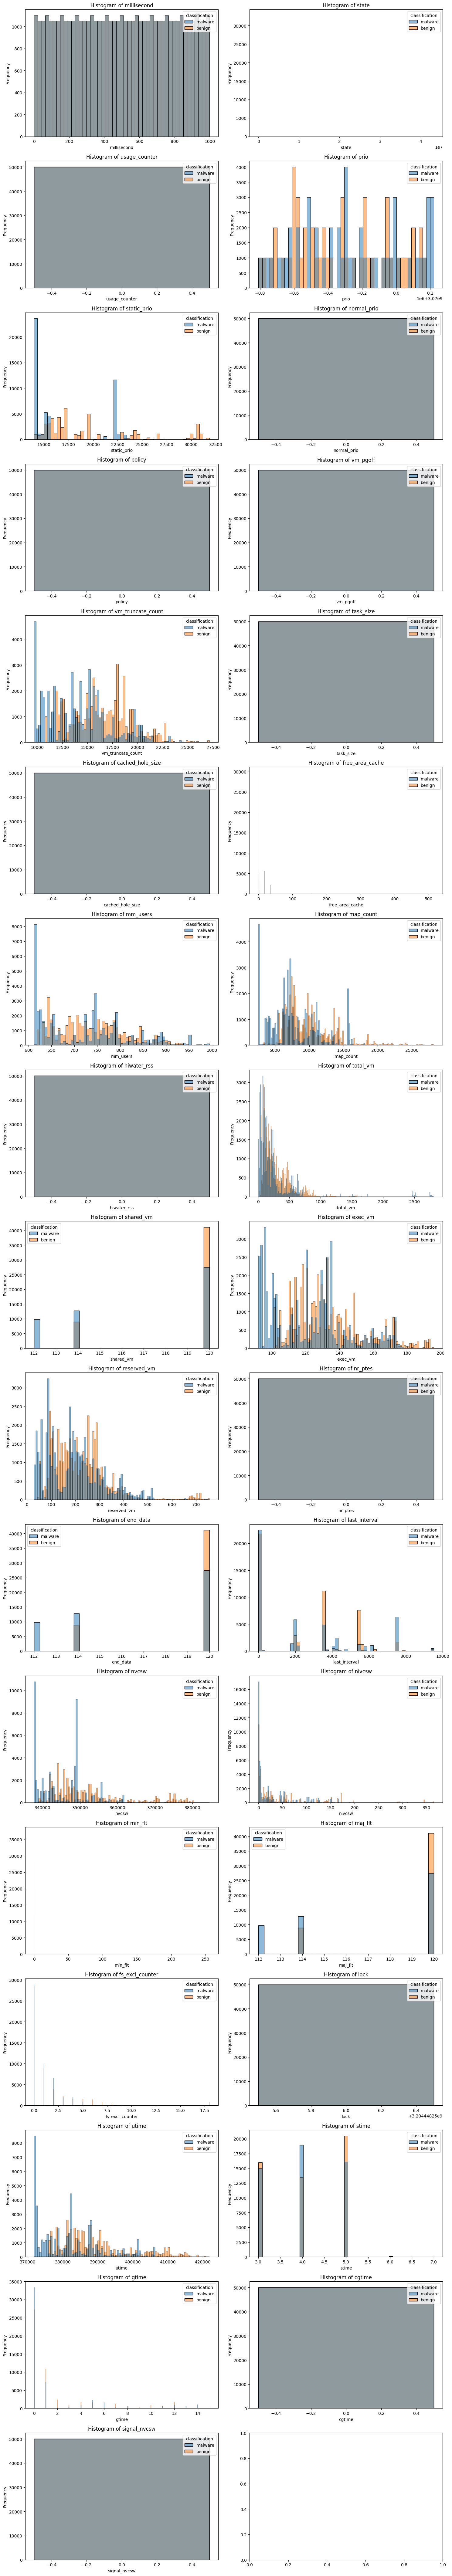

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
# Set the number of columns for subplots
num_cols = len(numeric_columns)

# Set the number of rows for subplots
num_rows = (num_cols + 1) // 2  # Ensure at least 2 columns

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten axes if necessary
axes = axes.flatten()

# Loop through each numerical column and plot
for i, col in enumerate(numeric_columns):
    sns.histplot(x=col, hue='classification', data=df, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

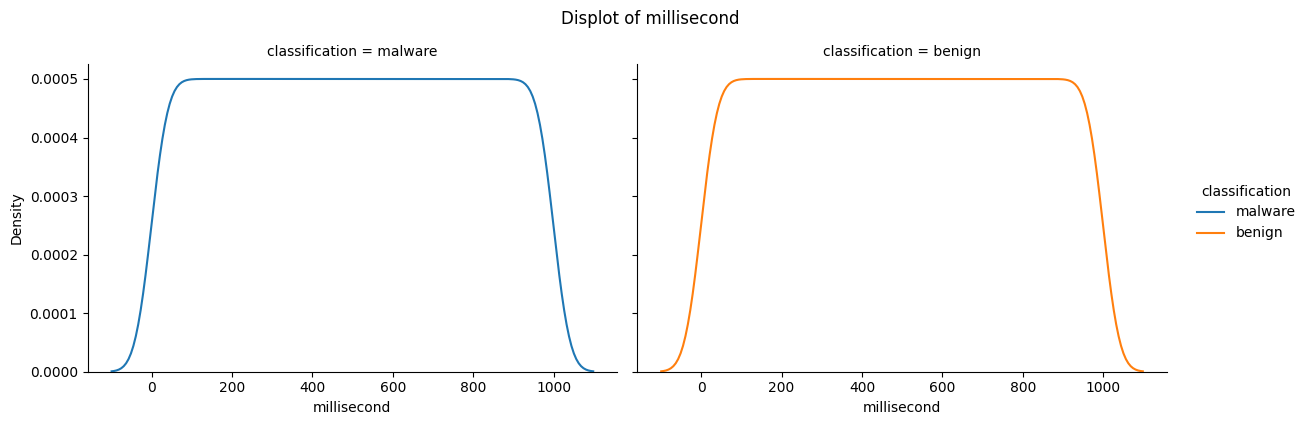

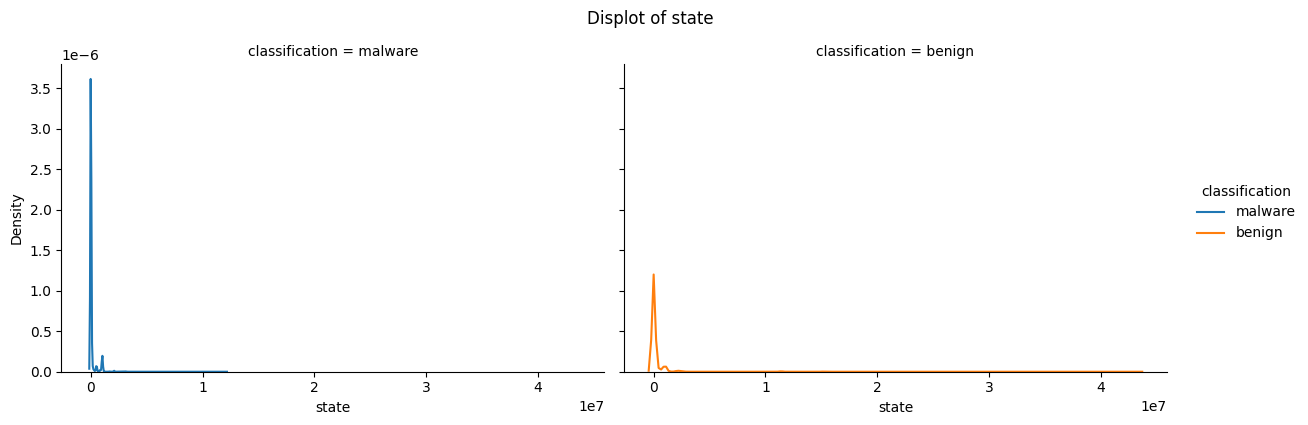

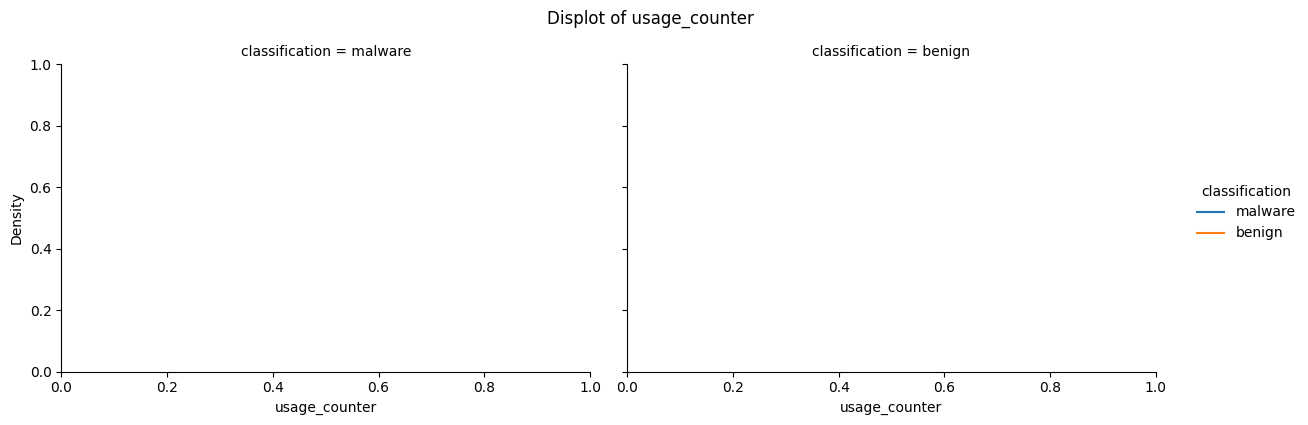

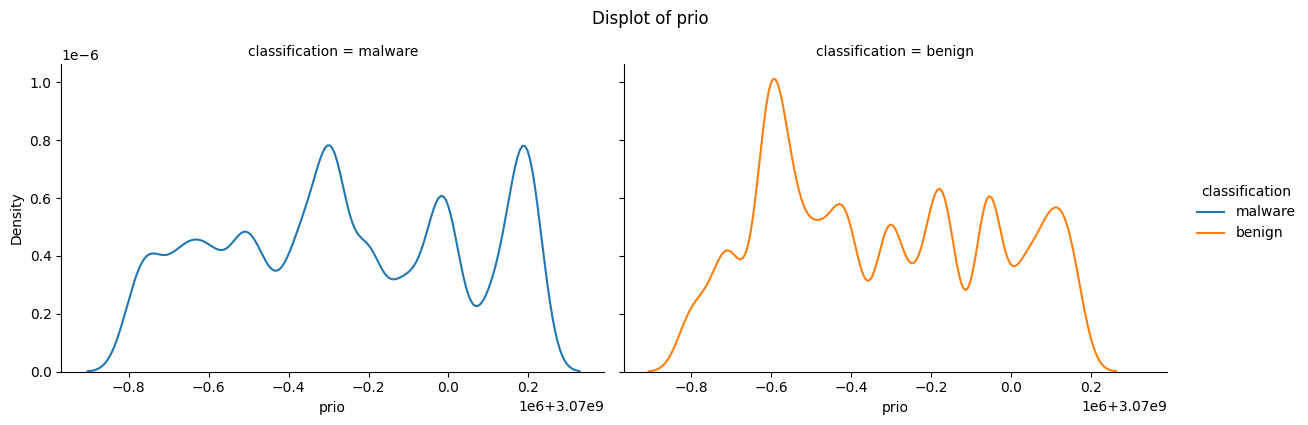

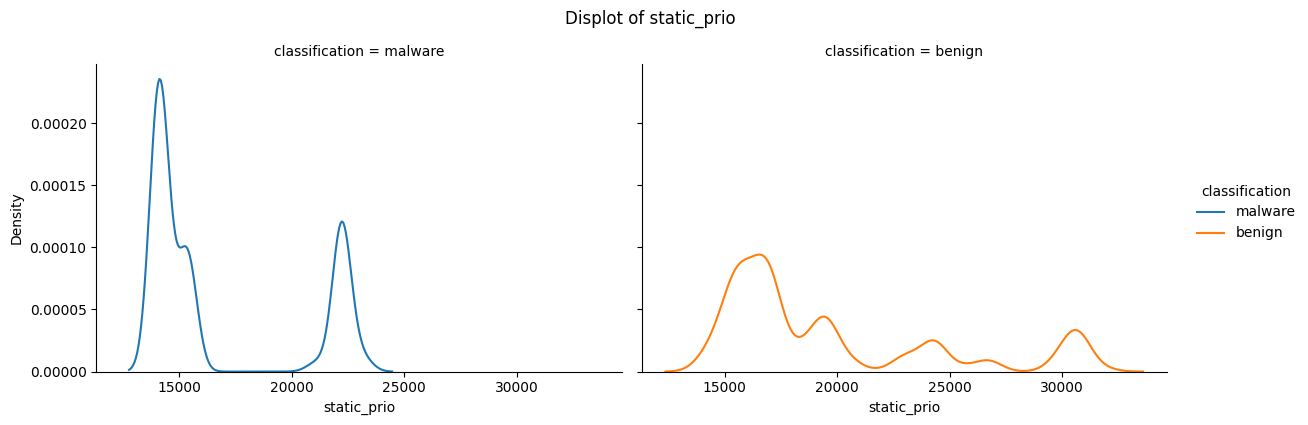

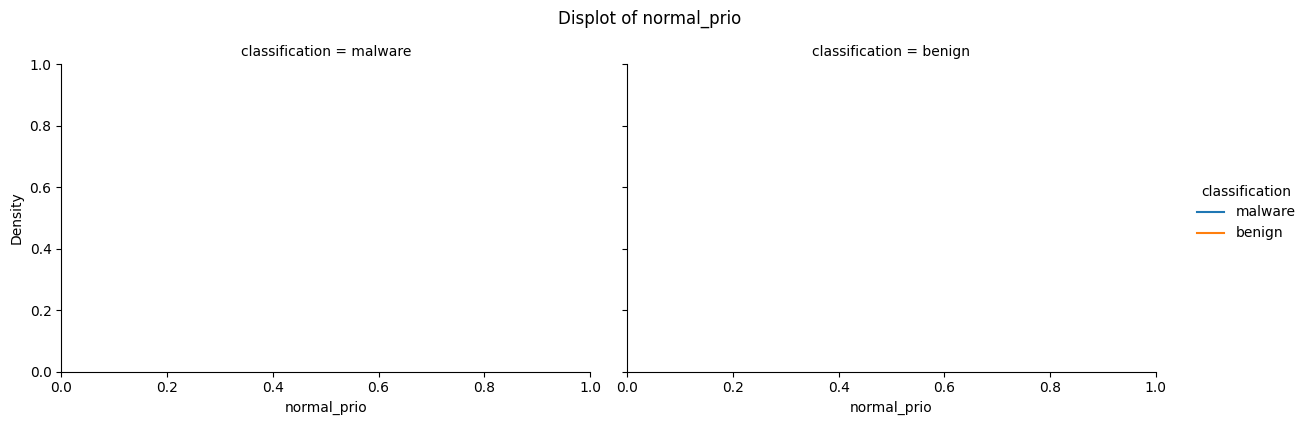

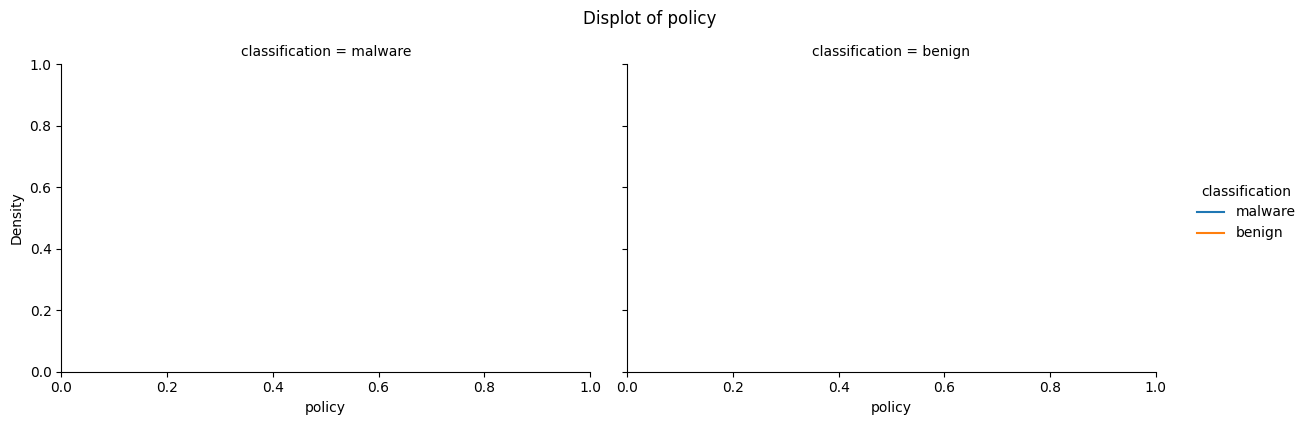

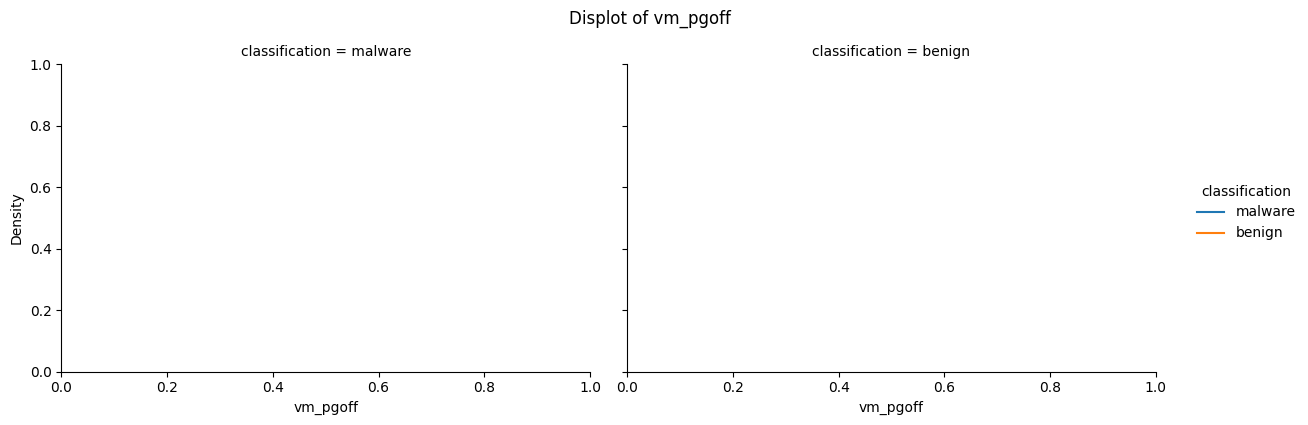

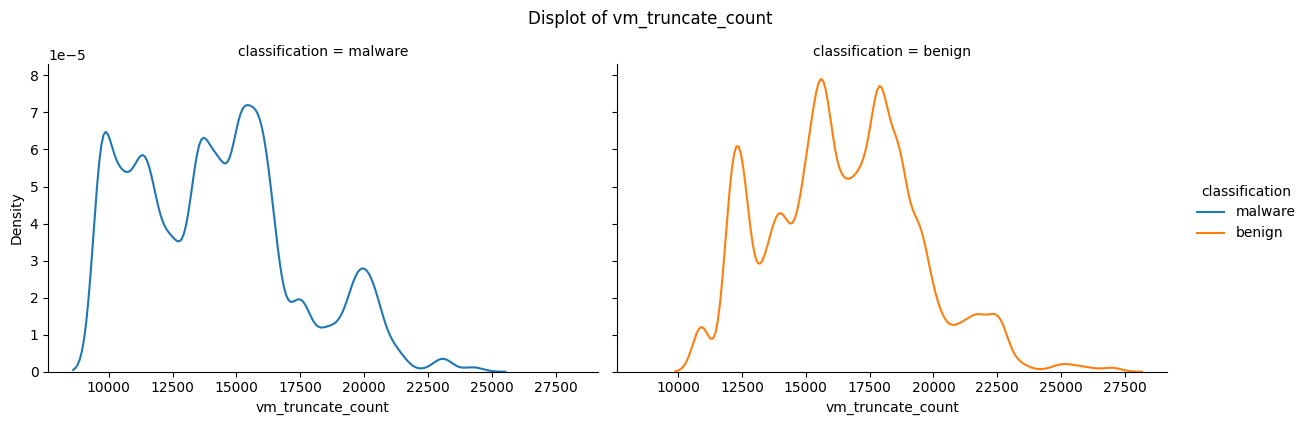

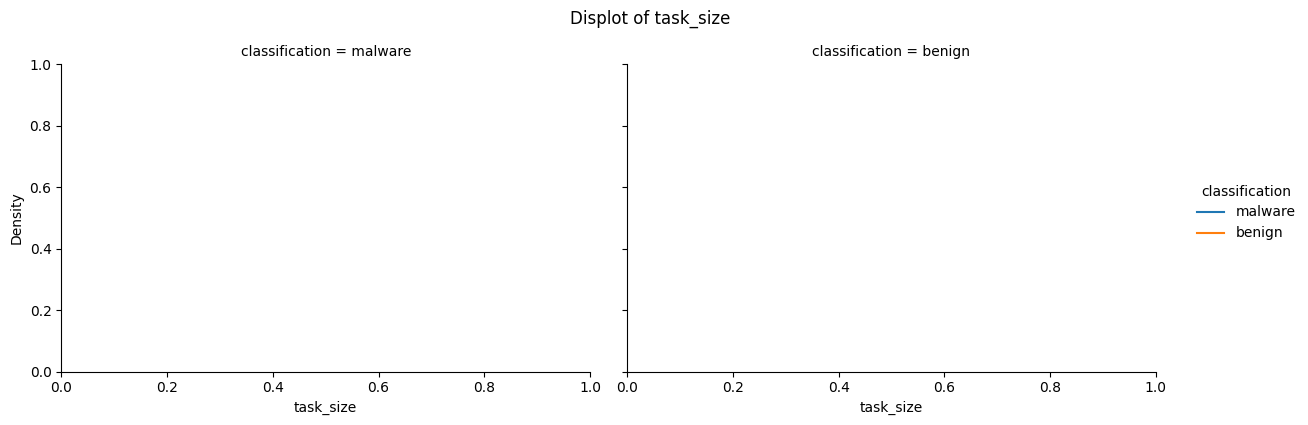

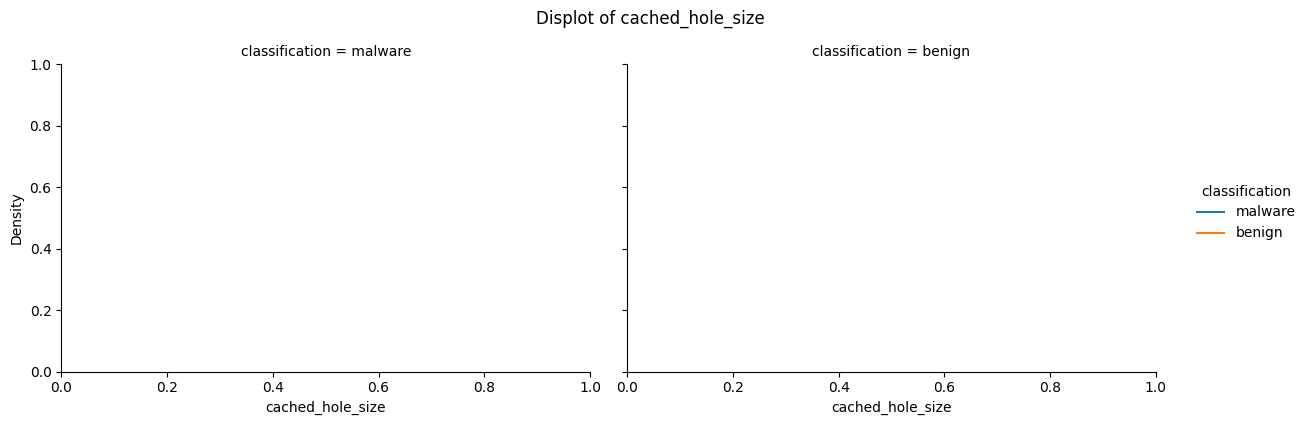

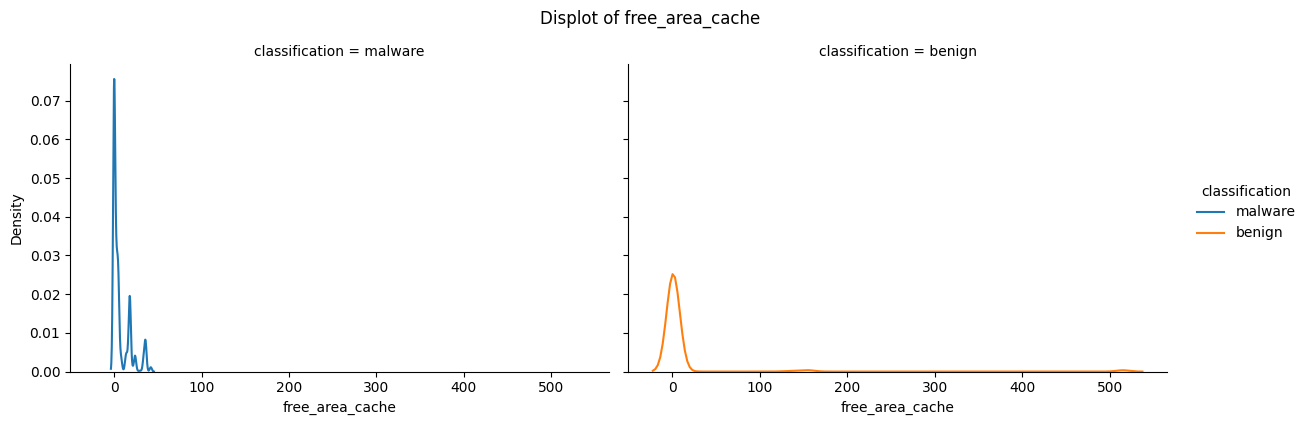

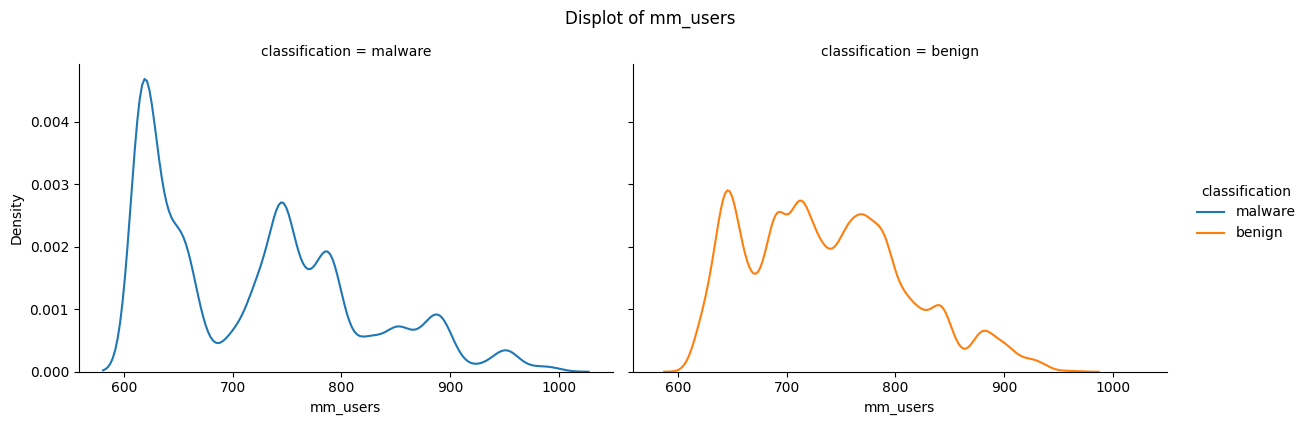

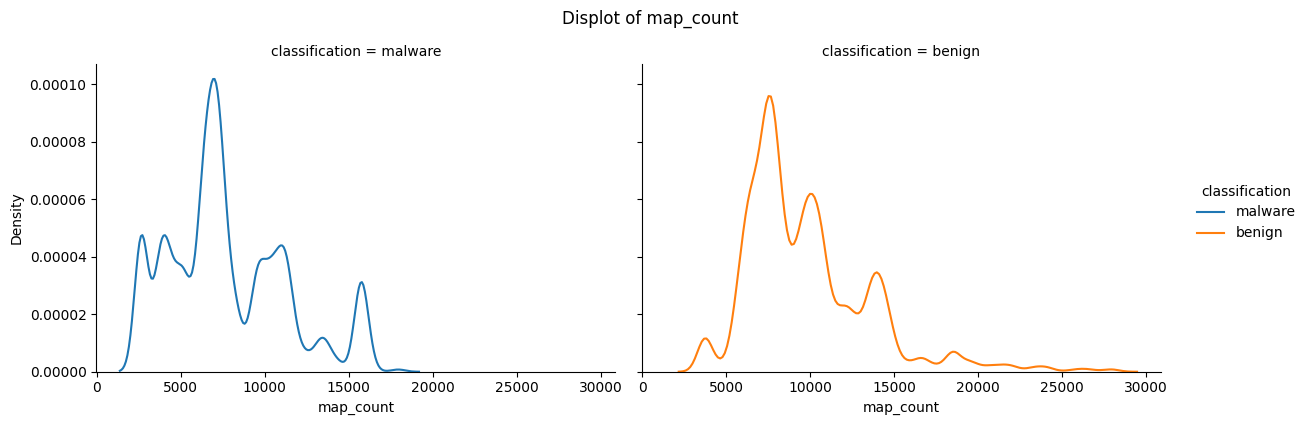

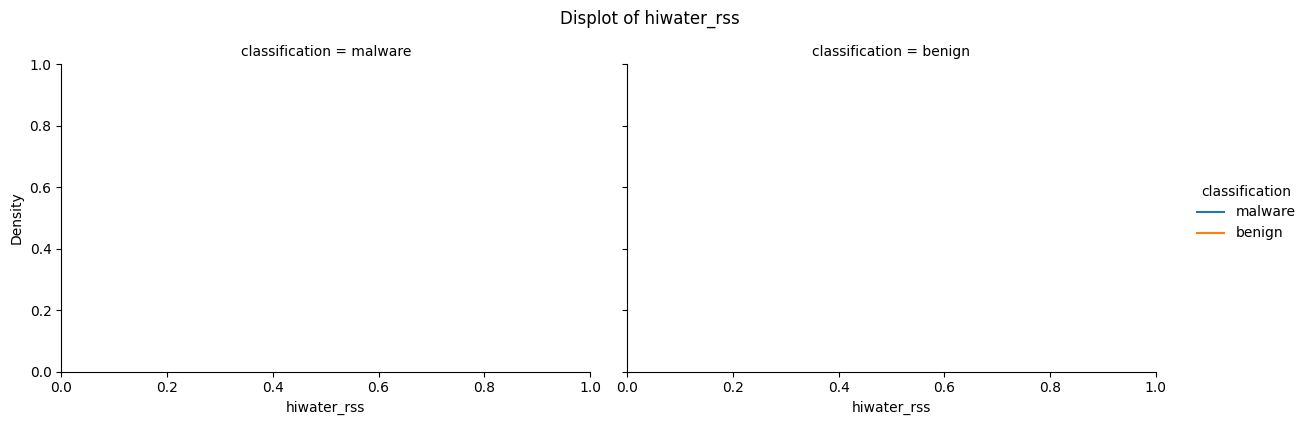

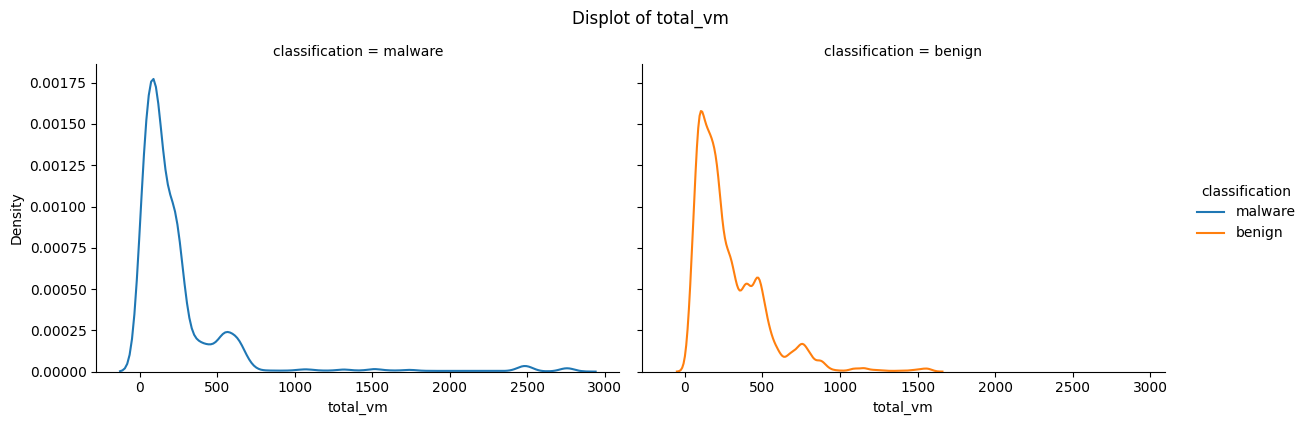

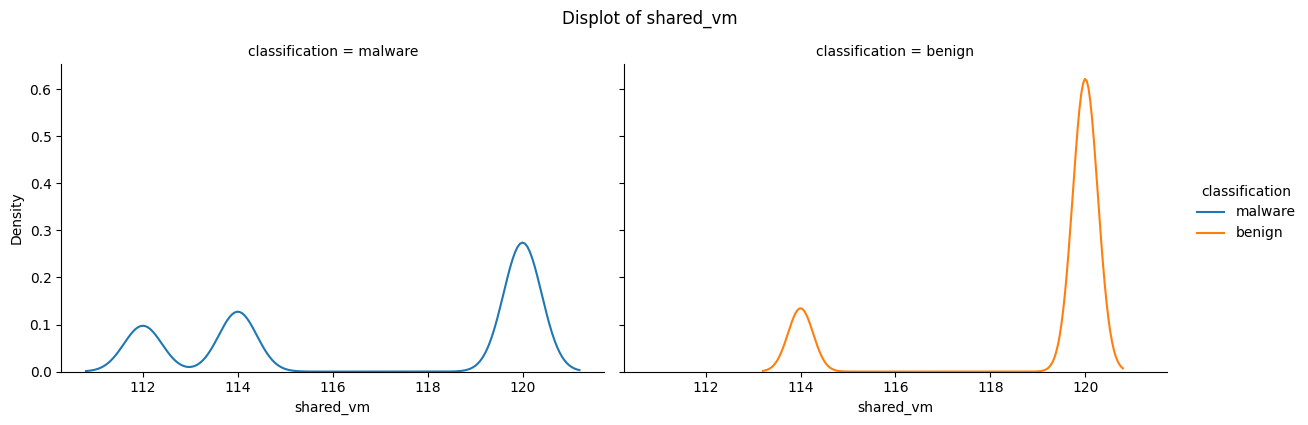

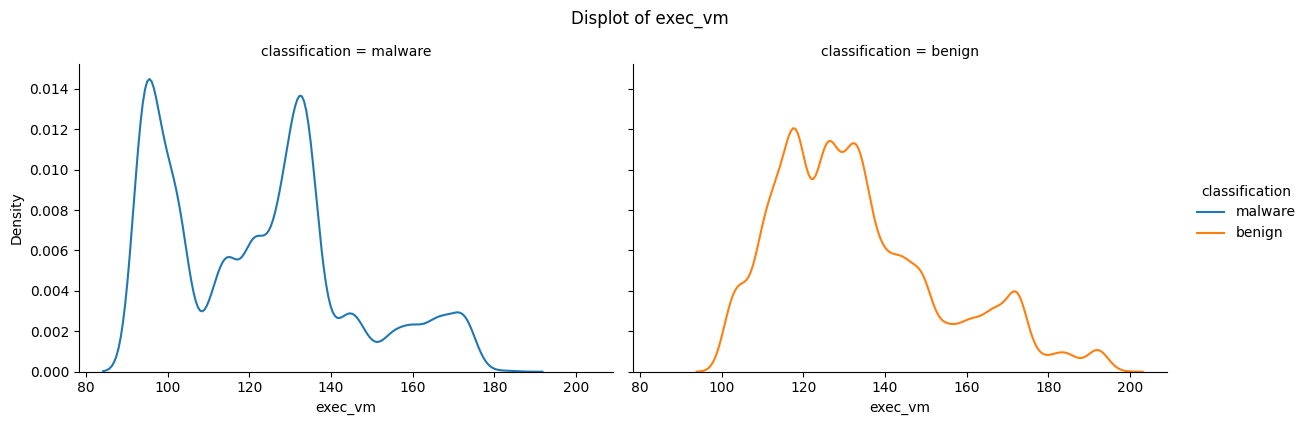

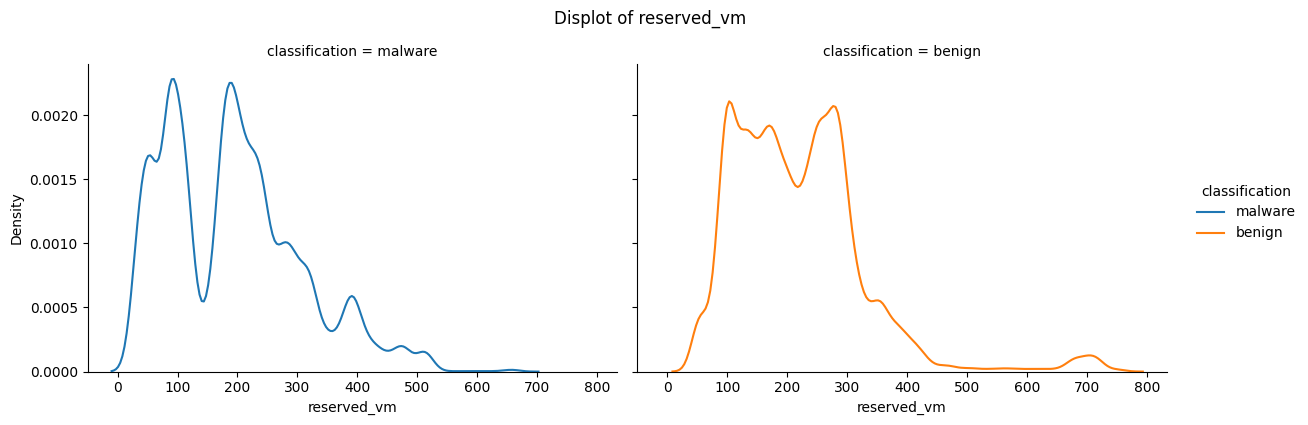

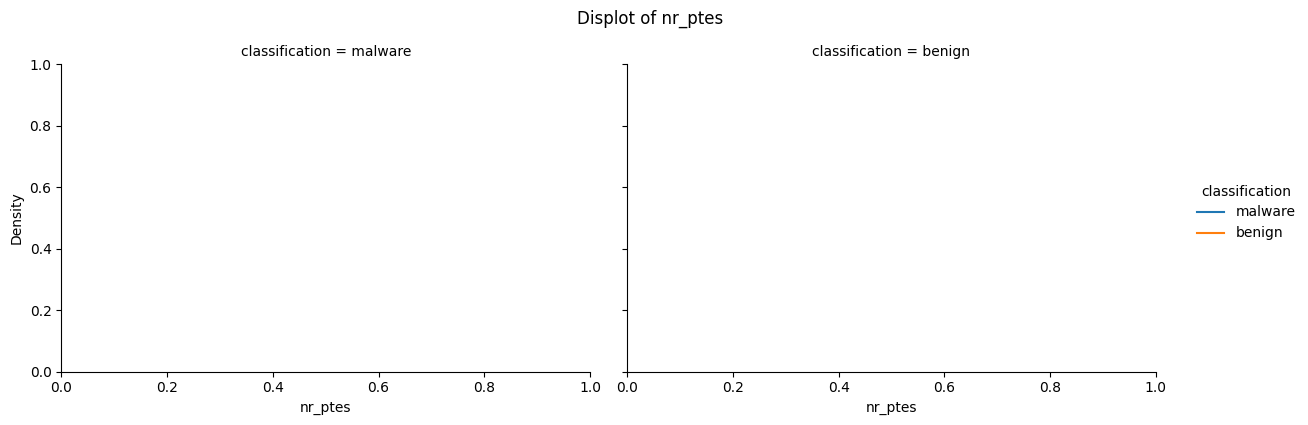

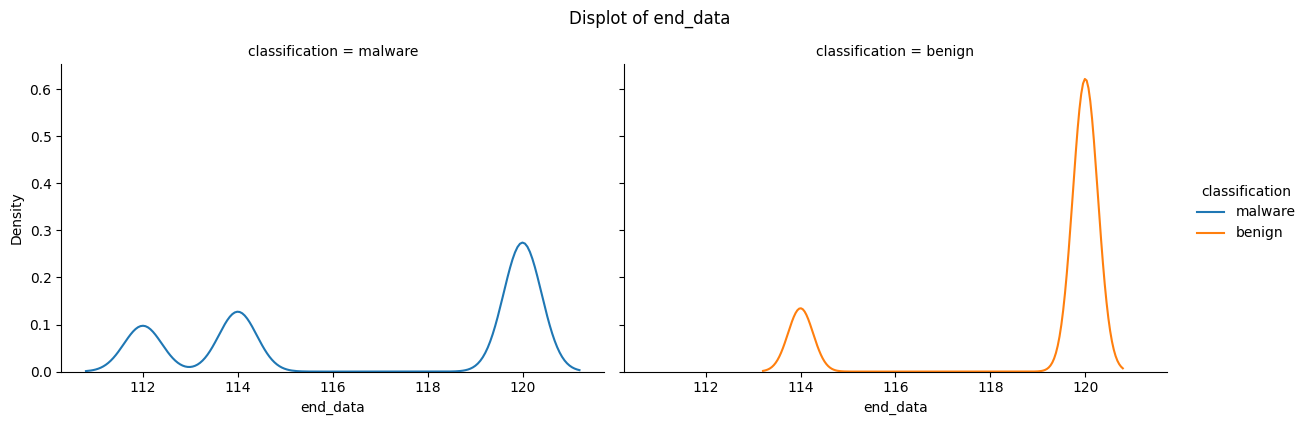

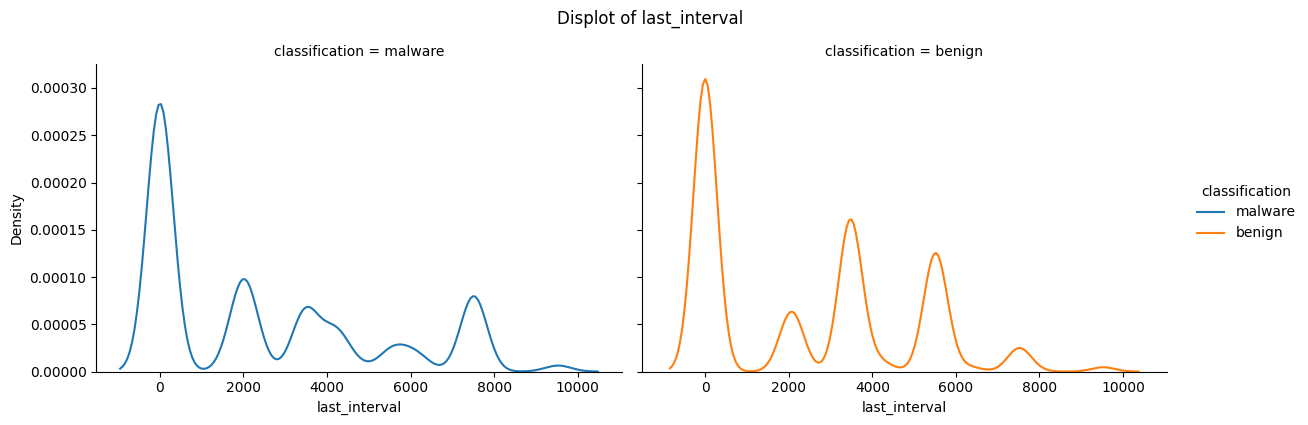

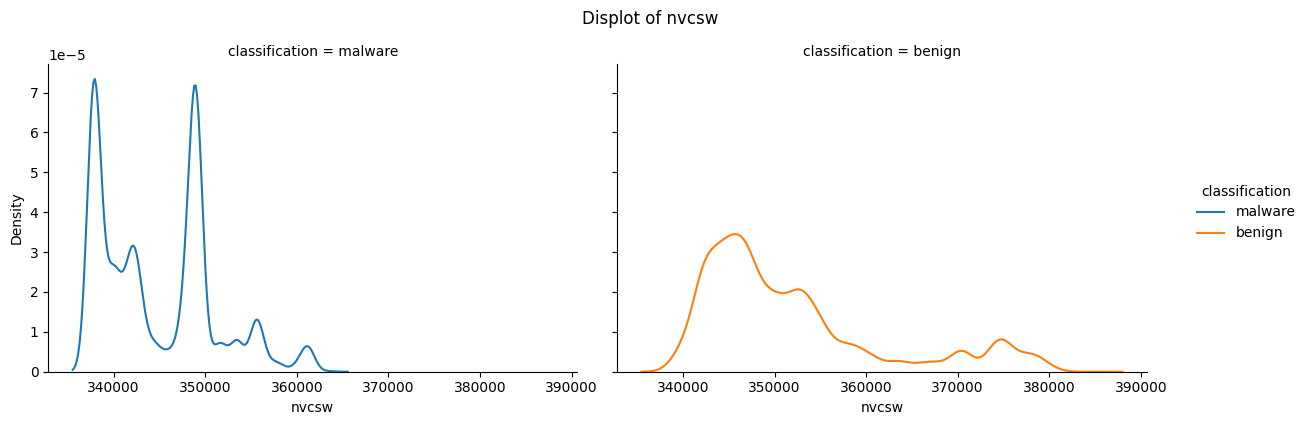

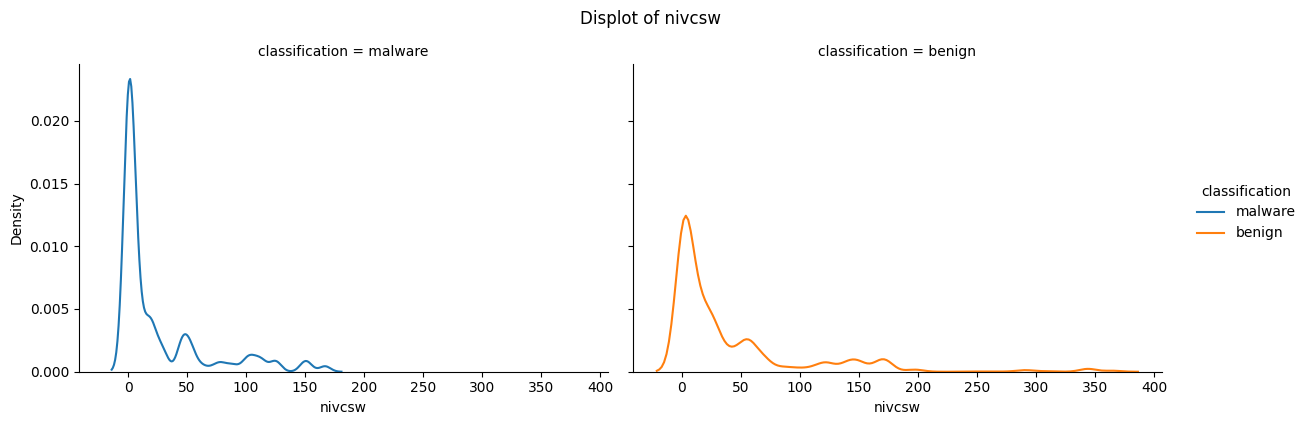

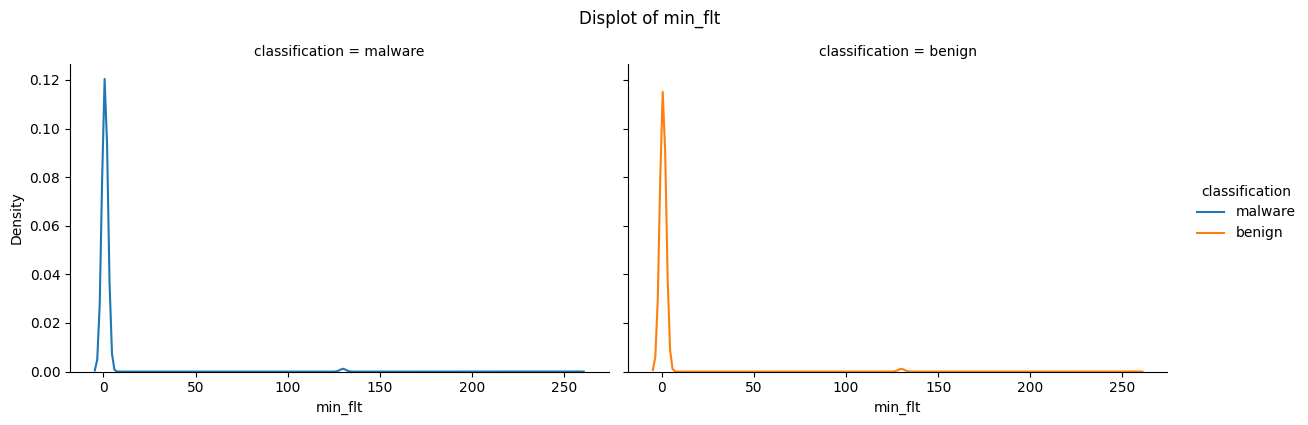

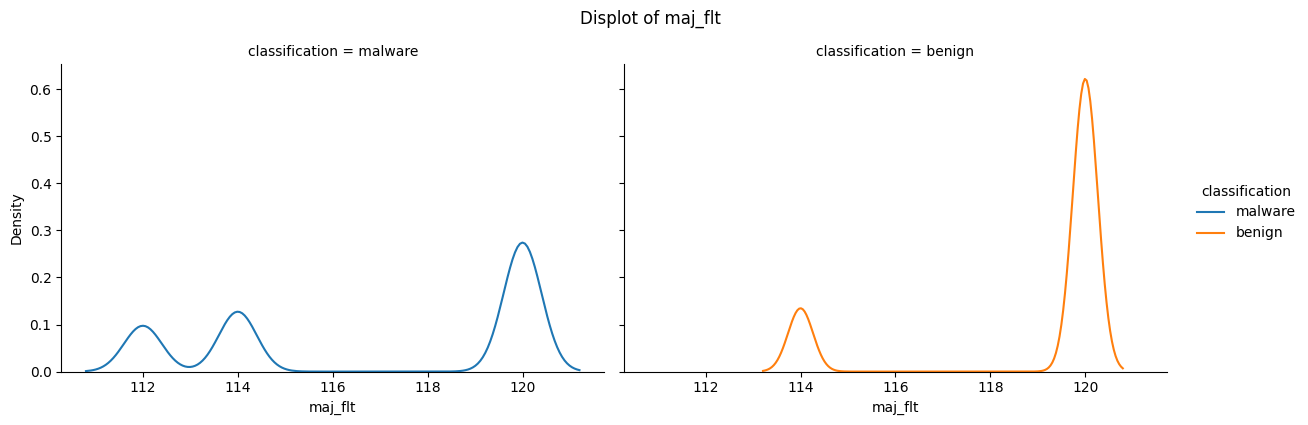

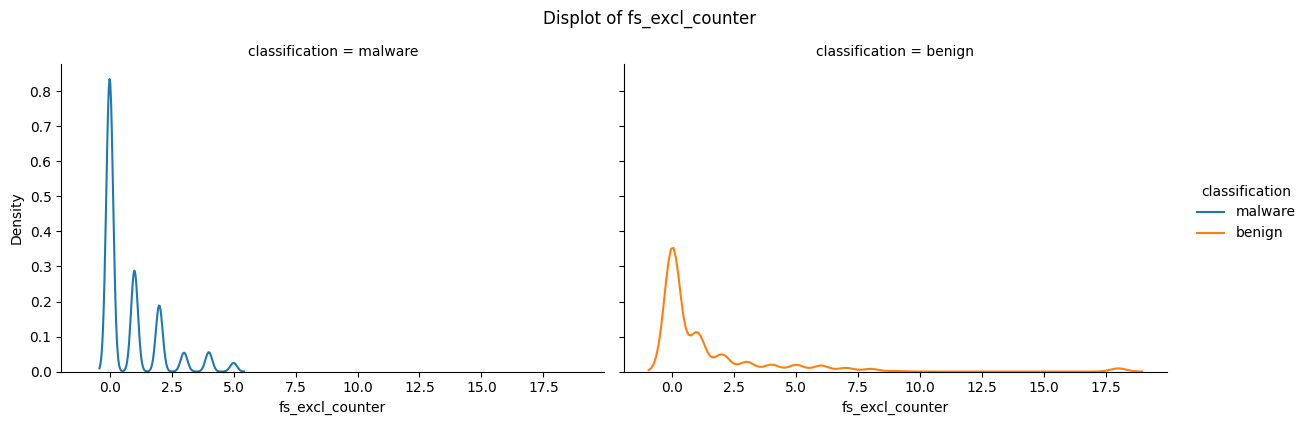

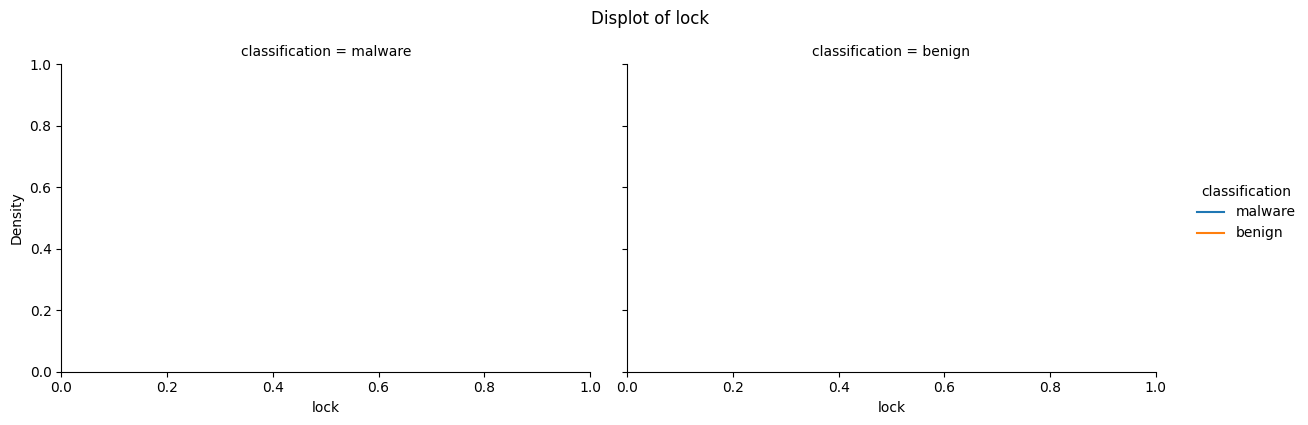

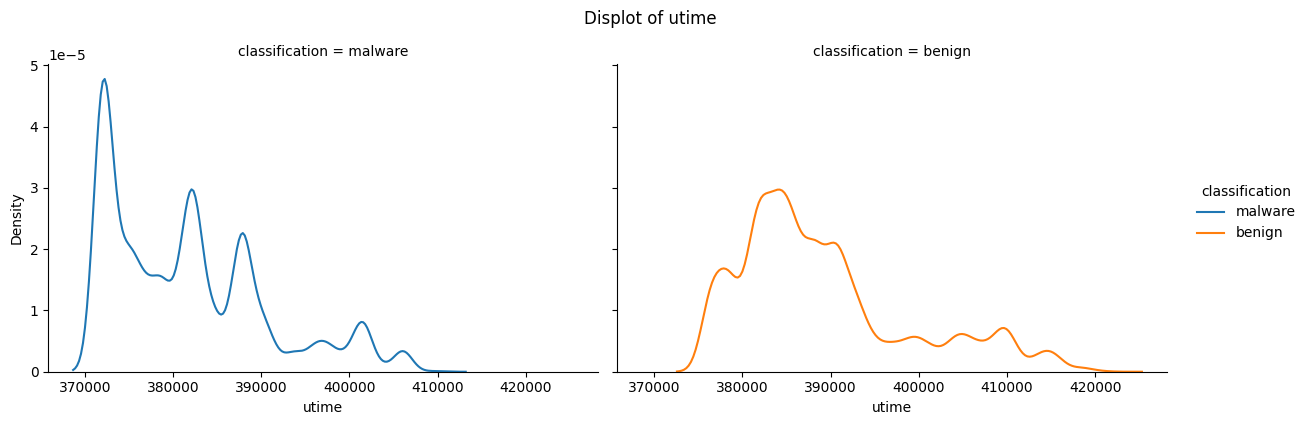

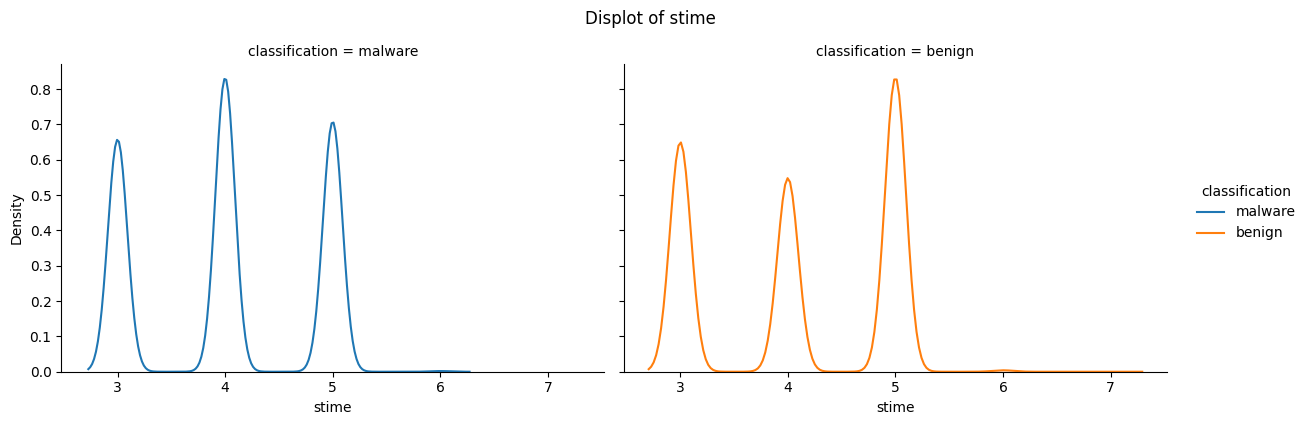

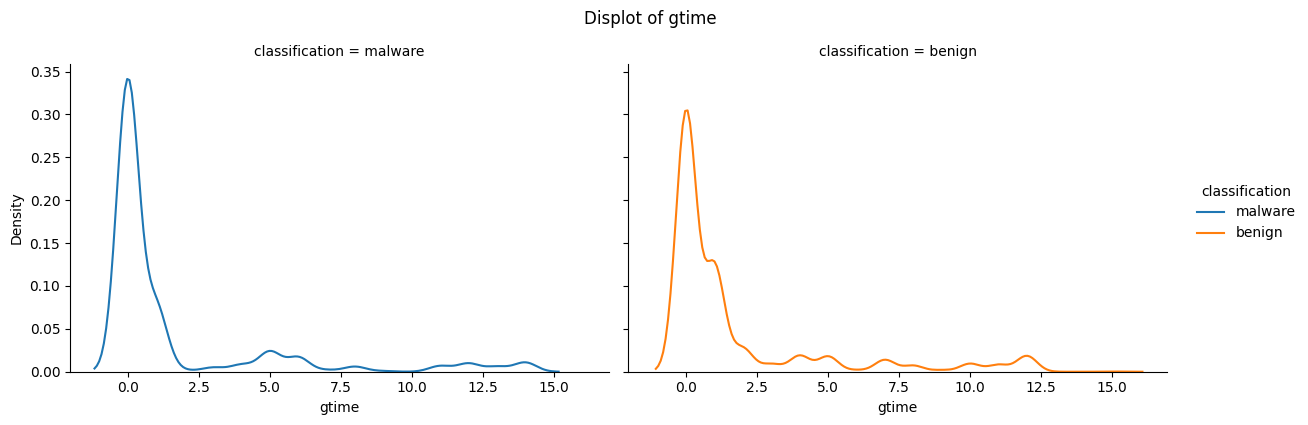

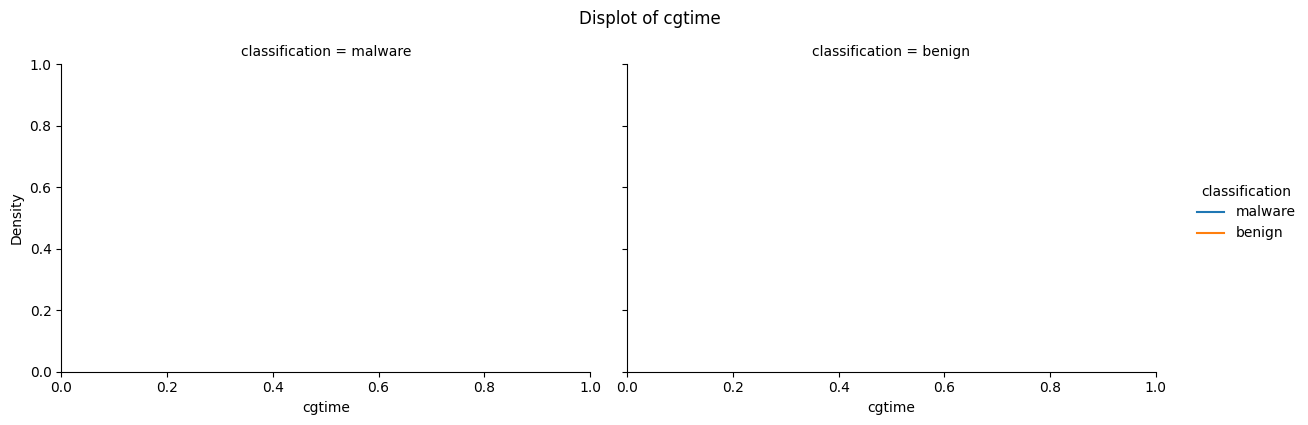

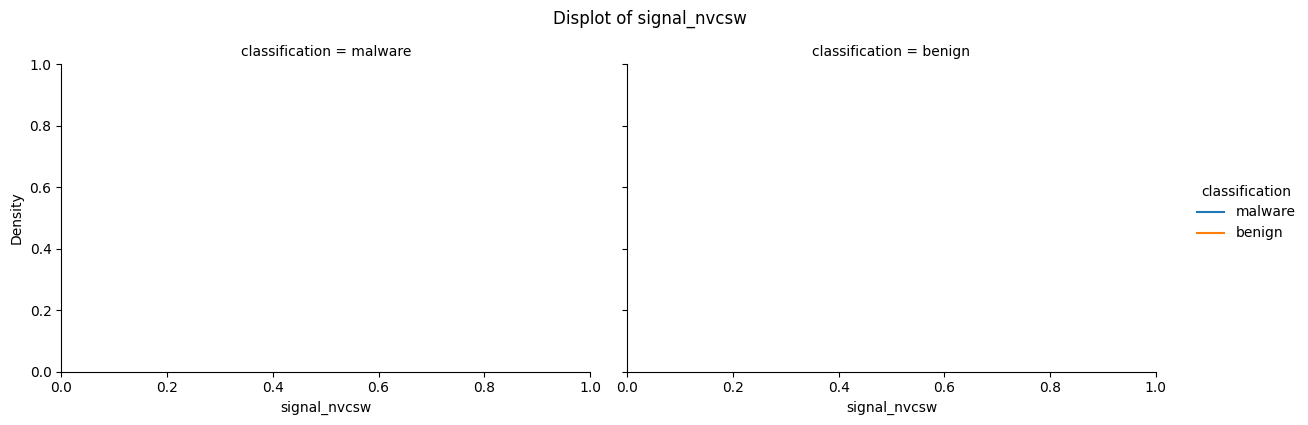

In [ ]:
# Create displot with faceting by classification for each numeric column
for col in numeric_columns:
    g = sns.displot(df, x=col, hue='classification', kind='kde', col='classification', height=4, aspect=1.5)
    g.fig.suptitle(f'Displot of {col}', y=1.05)  # Adjust title position
    plt.show()


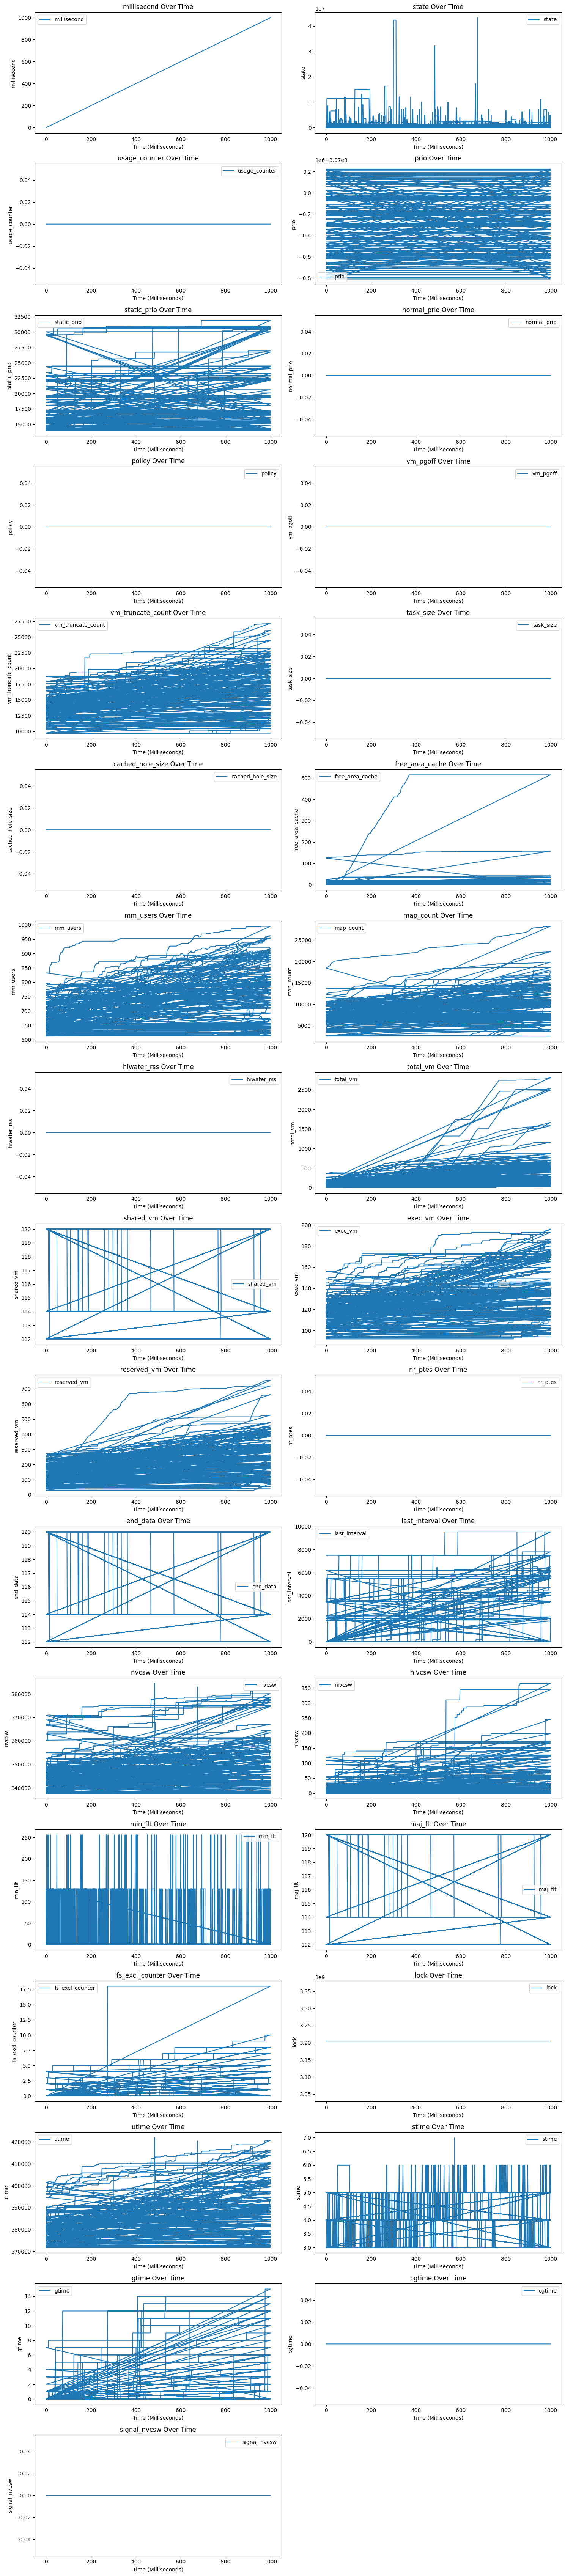

In [ ]:
fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))

# Flatten axes if necessary
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Plot each column in the list against 'millisecond'
for i, col in enumerate(numeric_columns):
    axs[i].plot(df['millisecond'], df[col], label=col)
    axs[i].set_xlabel('Time (Milliseconds)')
    axs[i].set_ylabel(col)
    axs[i].set_title(f'{col} Over Time')
    axs[i].legend()

# Remove any unused subplots
if len(numeric_columns) % 2 != 0:
    fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()

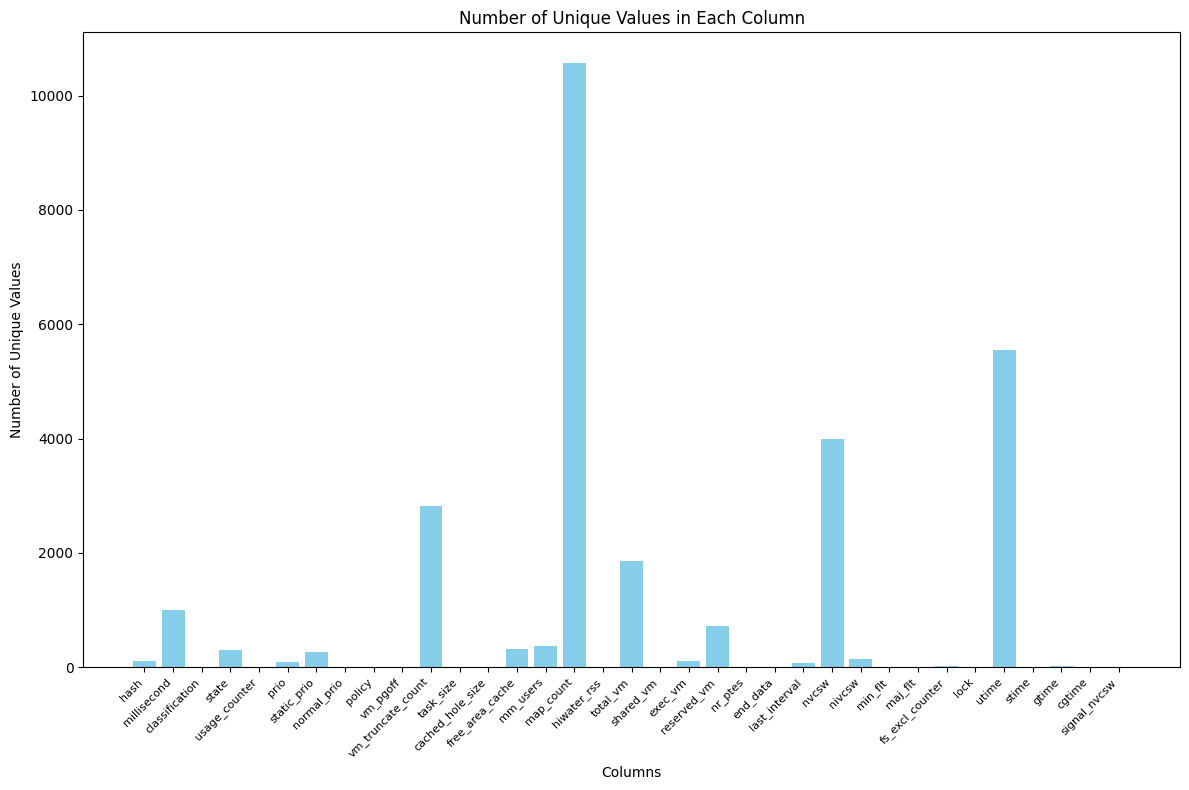

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df.nunique()

plt.figure(figsize=(12, 8))
plt.bar(unique_counts.index, unique_counts.values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
unique_counts

hash                   100
millisecond           1000
classification           2
state                  304
usage_counter            1
prio                    85
static_prio            271
normal_prio              1
policy                   1
vm_pgoff                 1
vm_truncate_count     2813
task_size                1
cached_hole_size         1
free_area_cache        310
mm_users               373
map_count            10578
hiwater_rss              1
total_vm              1850
shared_vm                3
exec_vm                105
reserved_vm            725
nr_ptes                  1
end_data                 3
last_interval           67
nvcsw                 3994
nivcsw                 150
min_flt                  5
maj_flt                  3
fs_excl_counter         12
lock                     1
utime                 5547
stime                    5
gtime                   16
cgtime                   1
signal_nvcsw             1
dtype: int64

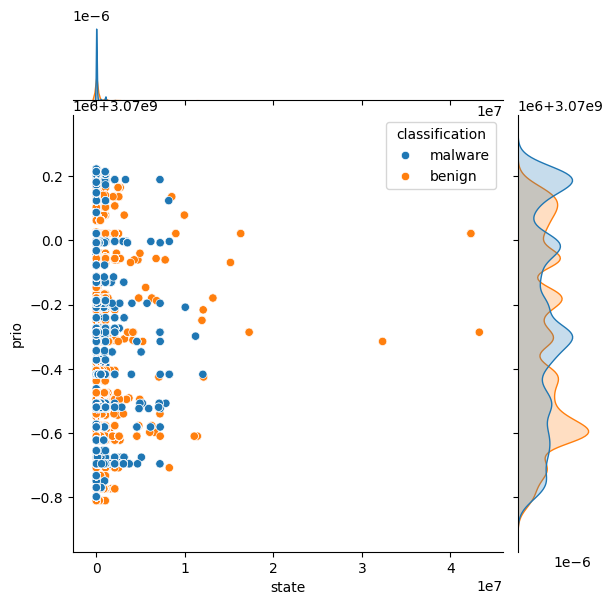

In [ ]:
sns.jointplot(x='state', y='prio', hue='classification', data=df, kind='scatter')



In [ ]:
df['state'].value_counts()

state
0          60933
4096       14757
8192        4133
12288       2714
1007616     1021
           ...  
3153920        1
532480         1
159744         1
1998848        1
151552         1
Name: count, Length: 304, dtype: int64

In [ ]:
unique_states = df['state'].unique()
print(unique_states)

[       0     4096    16384    12288  6578176   118784  6037504   933888
   258048  2514944     8192   282624   593920  1167360  1024000    53248
   188416    61440  1032192   122880  1060864  8249344    24576  2084864
  1056768  1040384    69632  3301376  7192576   835584   184320   126976
   167936    20480  2088960    45056  8523776   712704   643072  2056192
   389120   286720   630784   983040   196608    49152    28672  2543616
  1892352   708608   380928    90112   147456   106496   200704  3182592
  1835008    32768   135168  1695744  2355200  1036288  1044480   622592
  4702208  7782400   782336   905216  4280320  2080768   155648   917504
 11210752   774144  1241088    73728   163840  4141056   450560  1028096
    36864    40960   786432    57344   921600   348160   262144   696320
  1019904   339968  8986624 16314368 42315776   913408   888832  1314816
   372736   552960  1478656   417792  1093632   233472   217088   851968
 12115968   798720   249856  7073792   294912   270

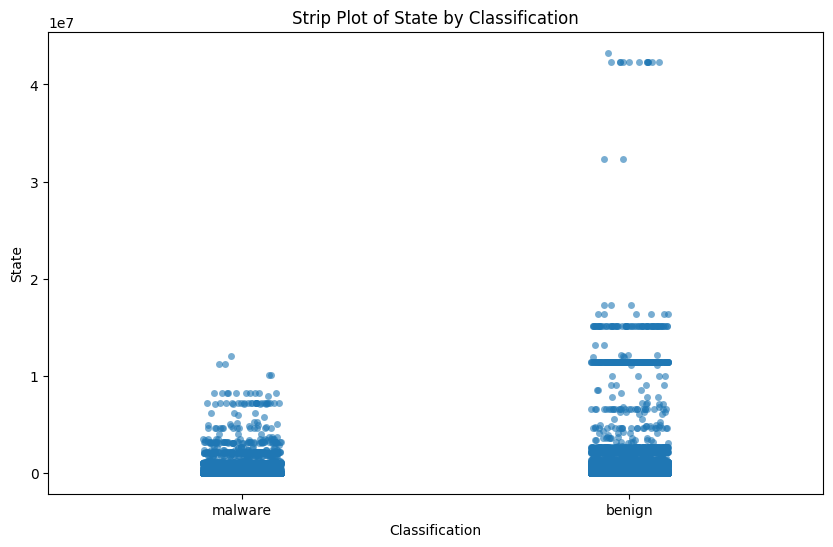

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='classification', y='state', data=df, jitter=True, alpha=0.6)
plt.title('Strip Plot of State by Classification')
plt.xlabel('Classification')
plt.ylabel('State')
plt.show()

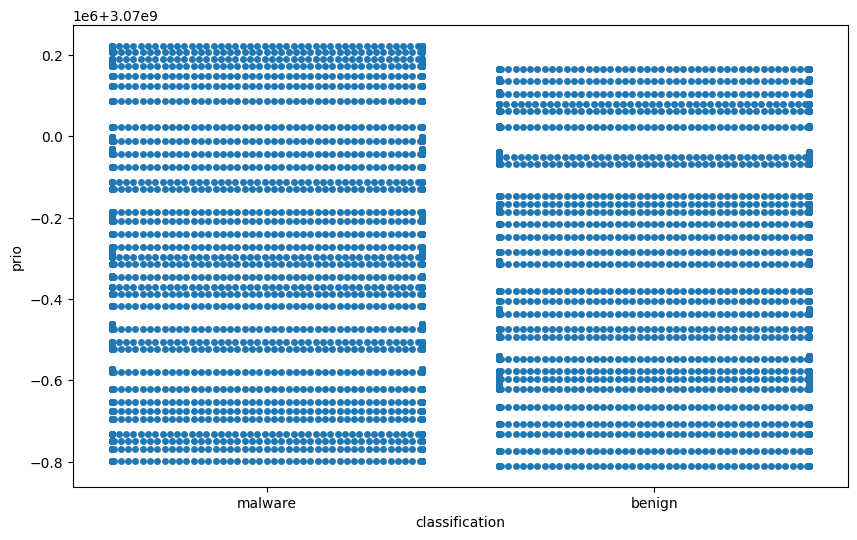

In [ ]:
# Downsample the data for plotting
df_sample = df.sample(frac=0.1, random_state=42)  # Using 10% of the data

plt.figure(figsize=(10, 6))
sns.swarmplot(x='classification', y='prio', data=df_sample)
plt.show()

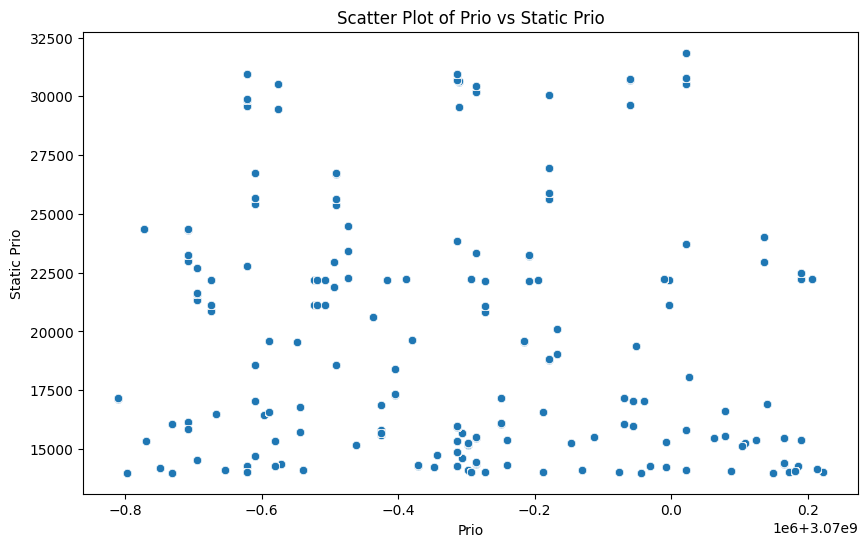

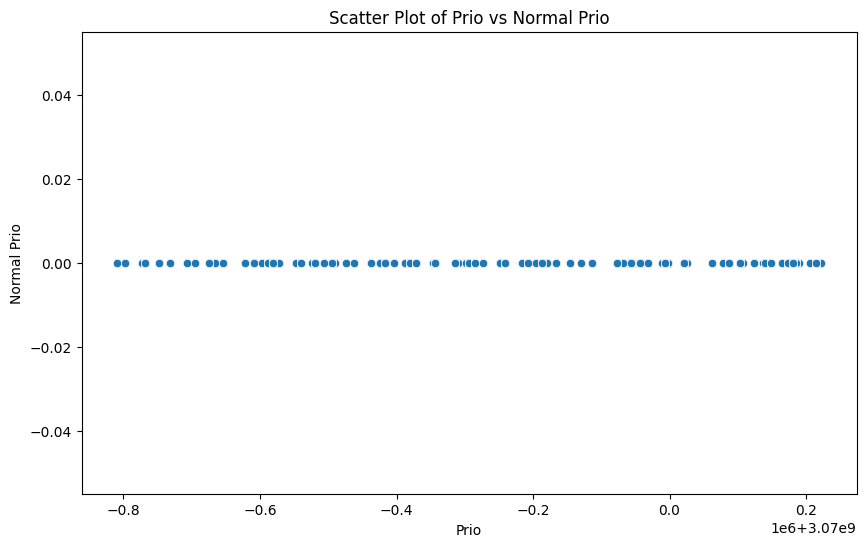

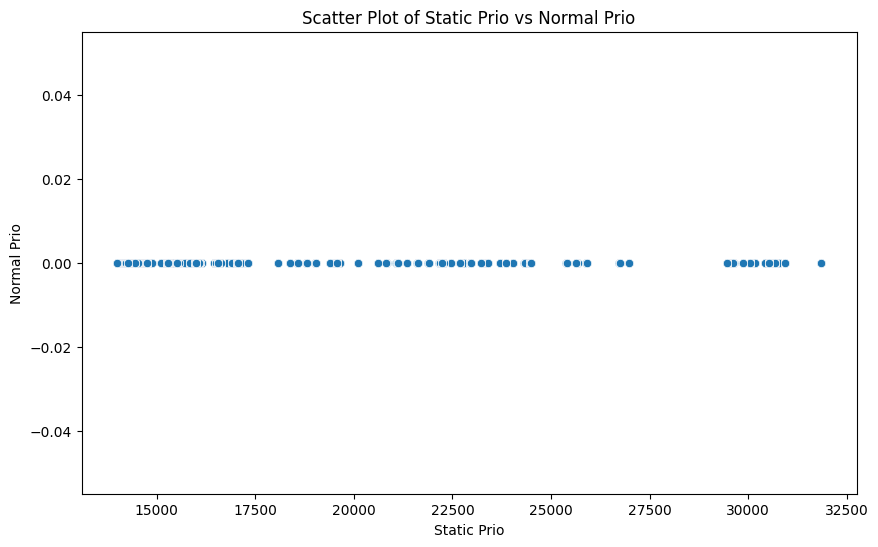

In [ ]:
# Scatter plot for prio vs static_prio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prio', y='static_prio', data=df)
plt.title('Scatter Plot of Prio vs Static Prio')
plt.xlabel('Prio')
plt.ylabel('Static Prio')
plt.show()

# Scatter plot for prio vs normal_prio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prio', y='normal_prio', data=df)
plt.title('Scatter Plot of Prio vs Normal Prio')
plt.xlabel('Prio')
plt.ylabel('Normal Prio')
plt.show()

# Scatter plot for static_prio vs normal_prio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='static_prio', y='normal_prio', data=df)
plt.title('Scatter Plot of Static Prio vs Normal Prio')
plt.xlabel('Static Prio')
plt.ylabel('Normal Prio')
plt.show()


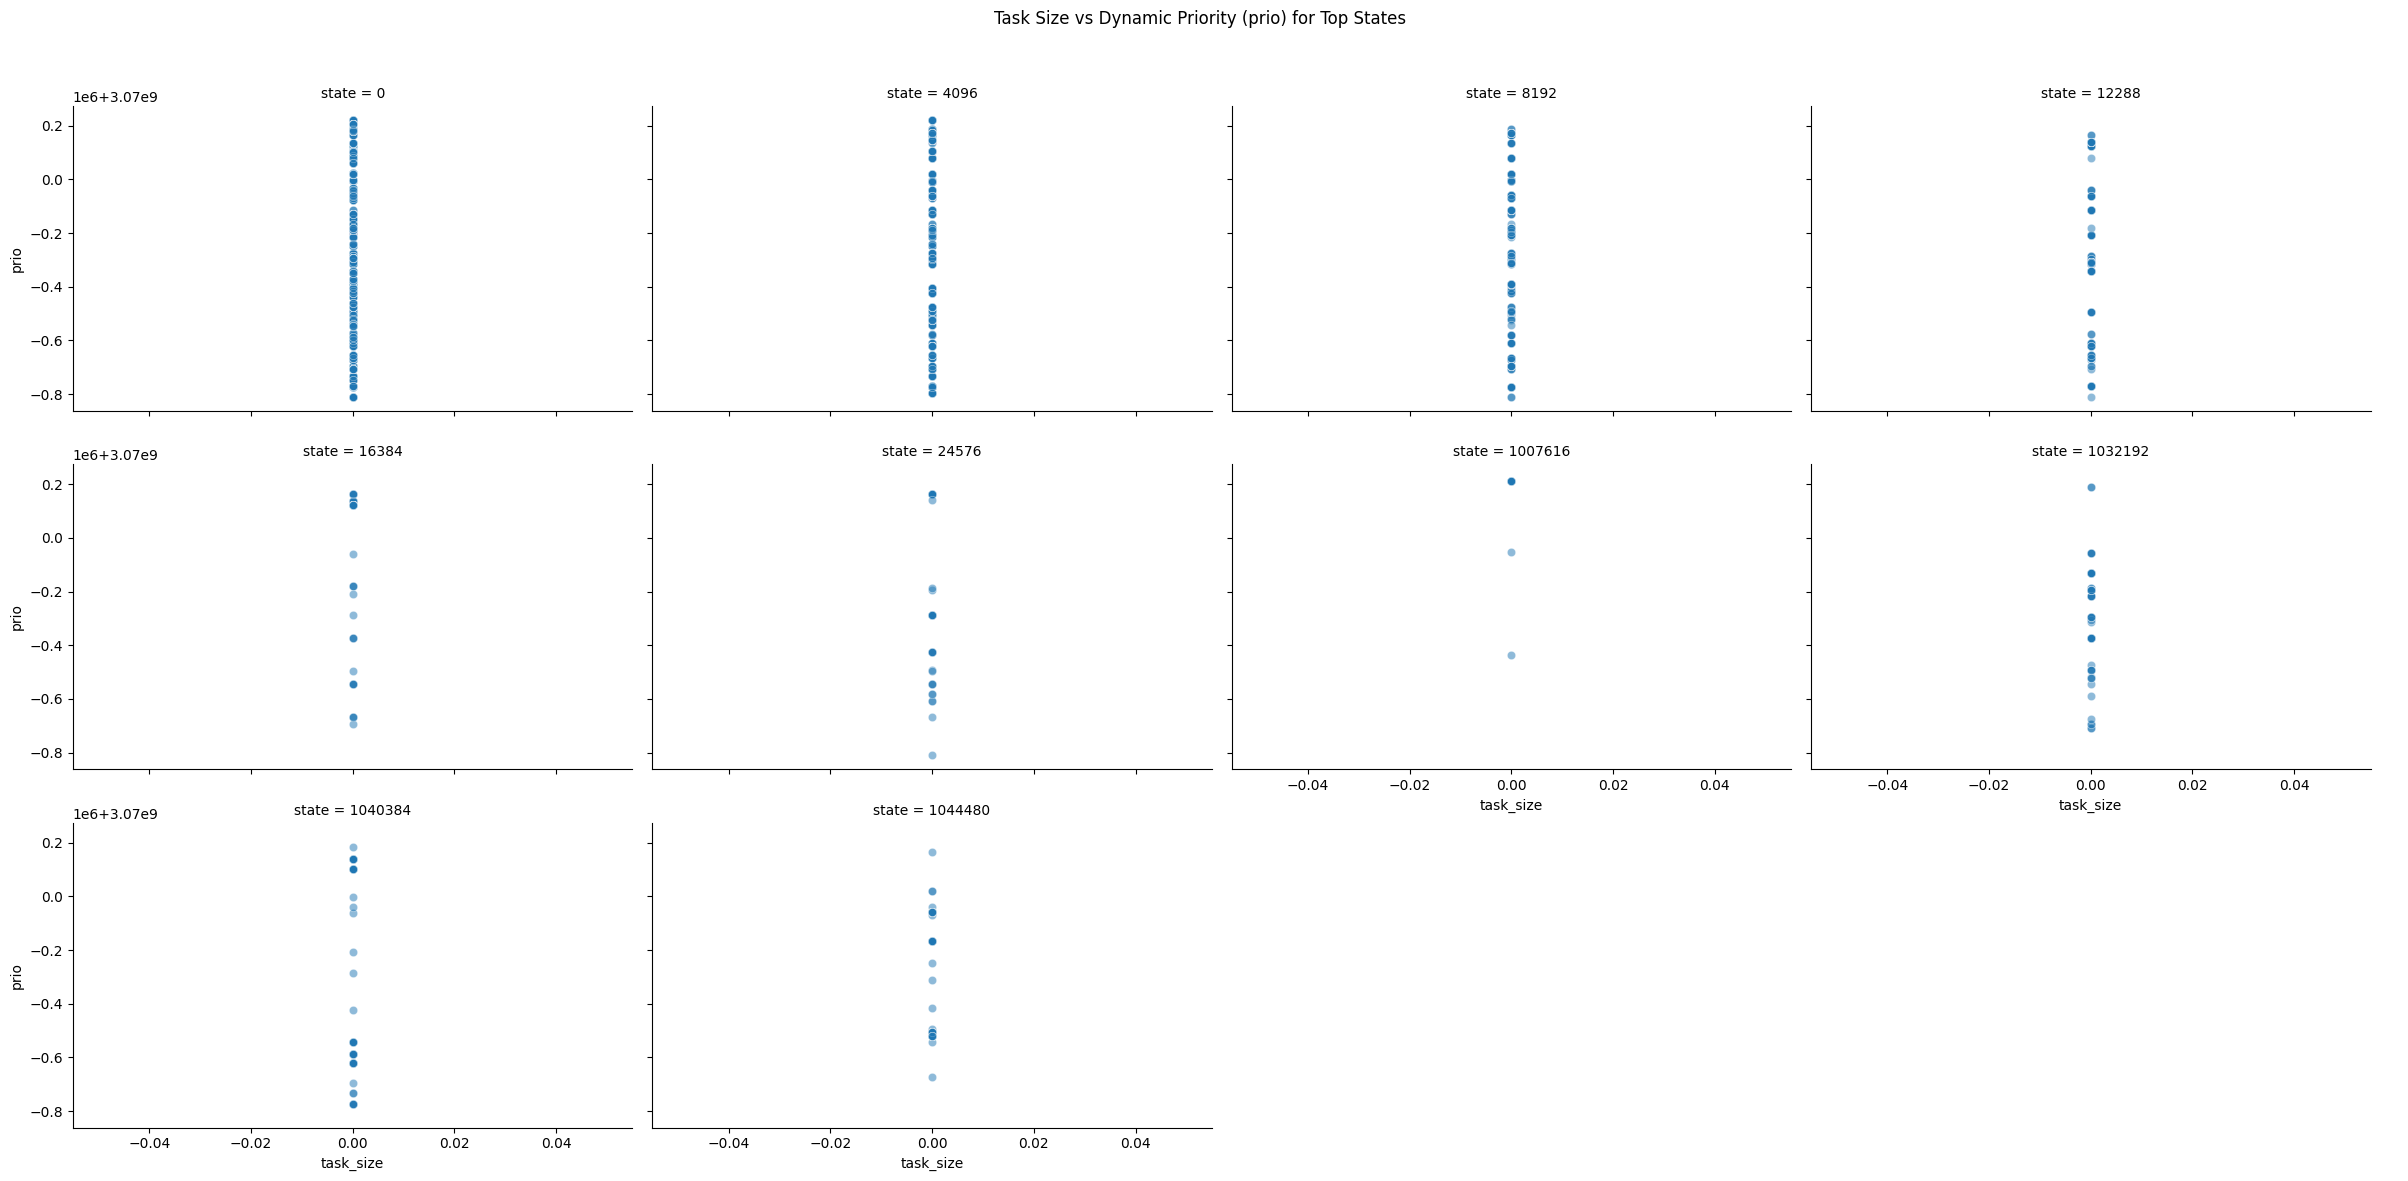

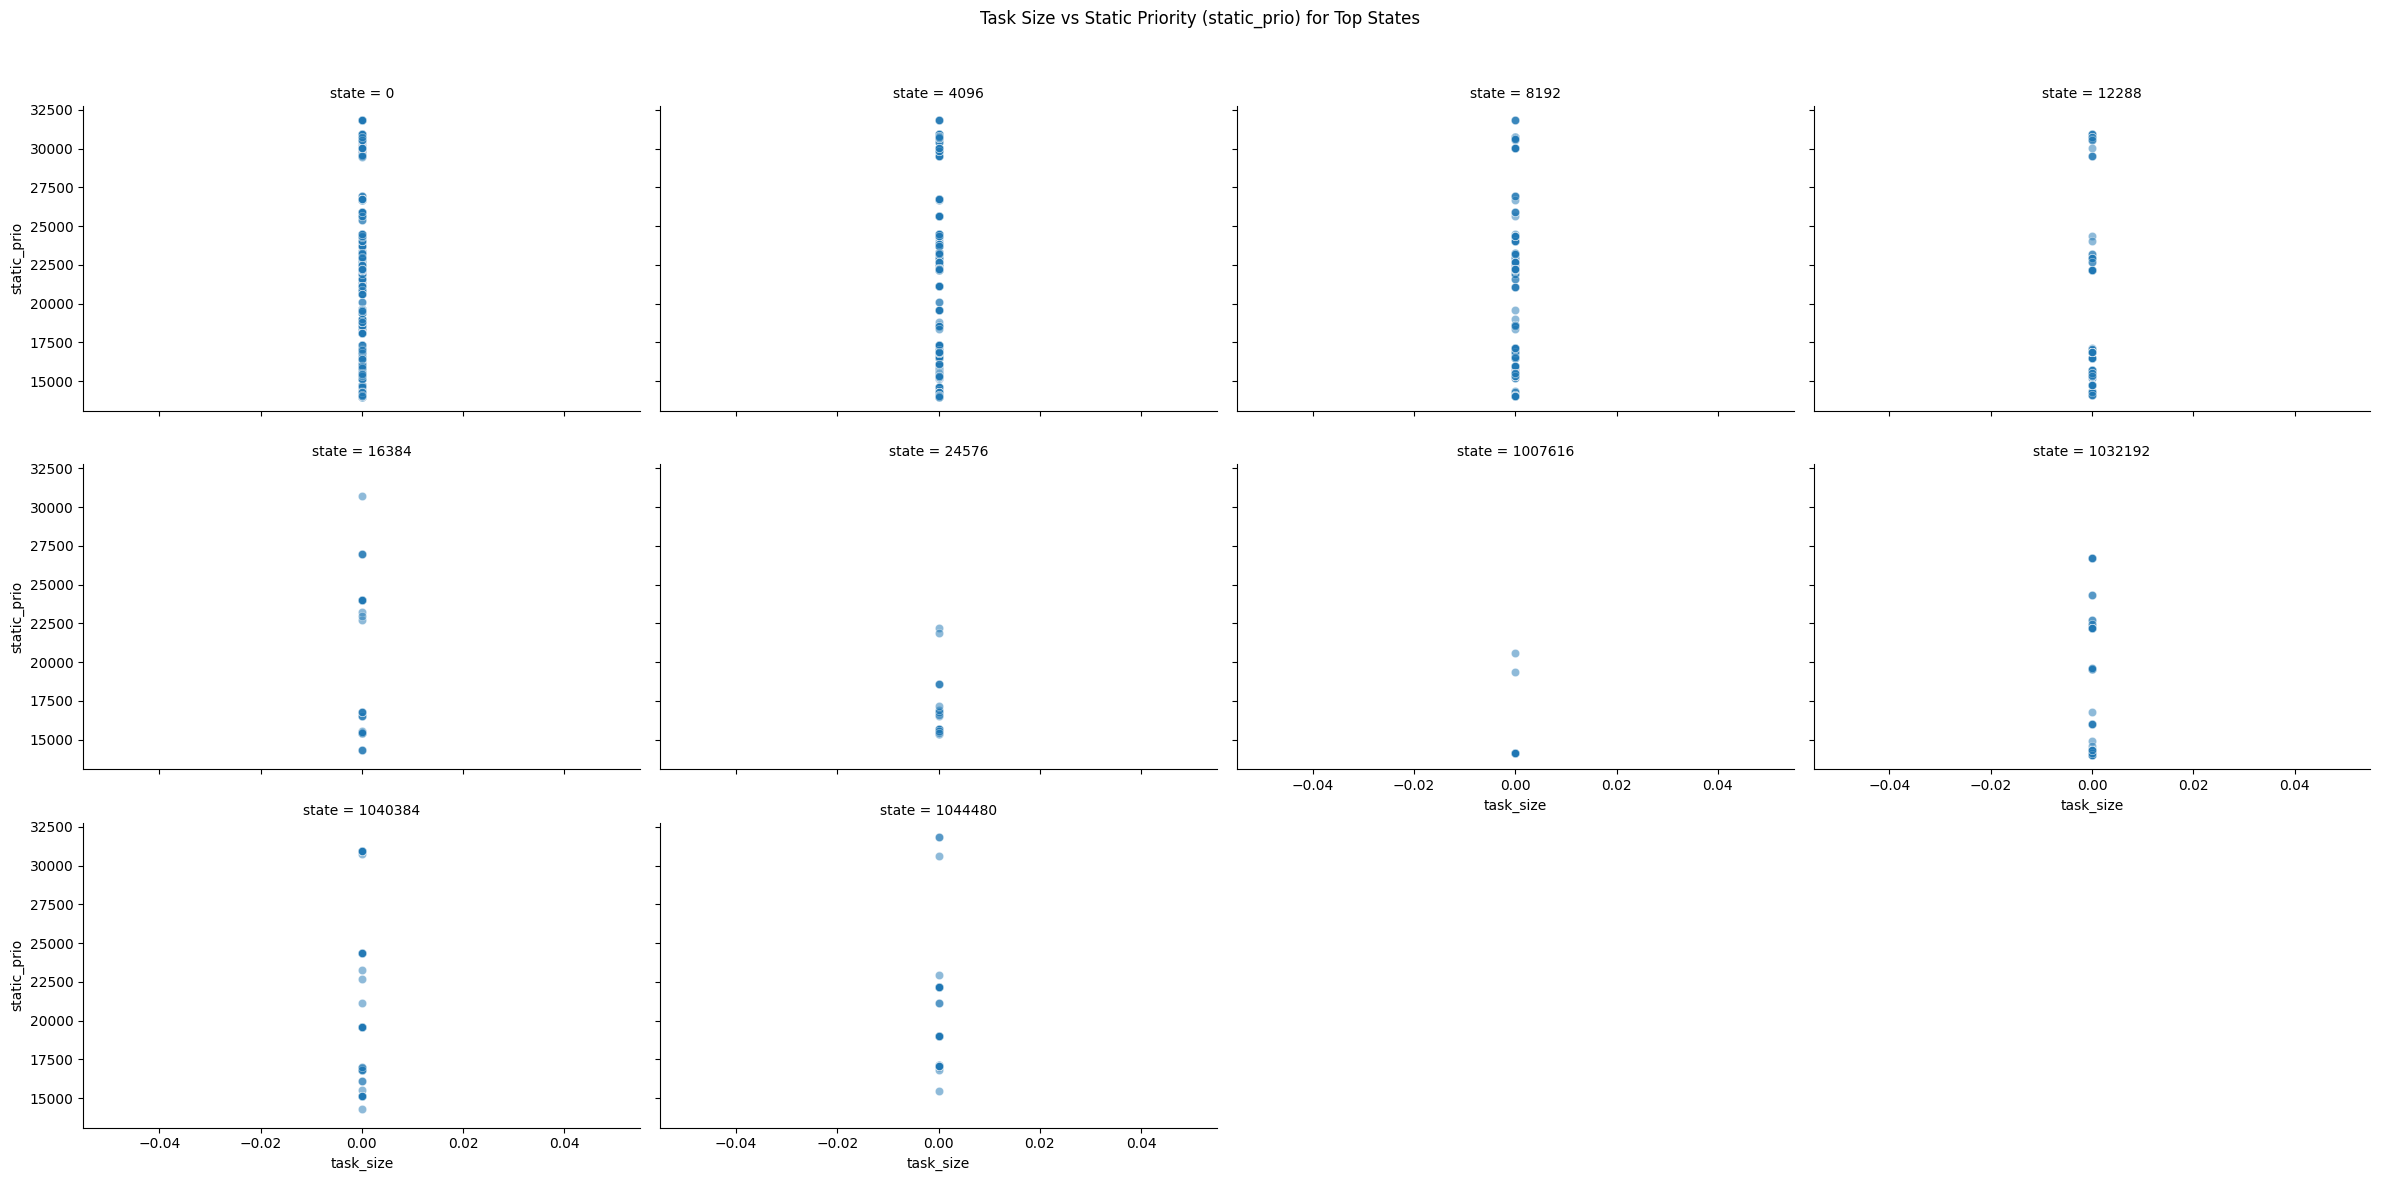

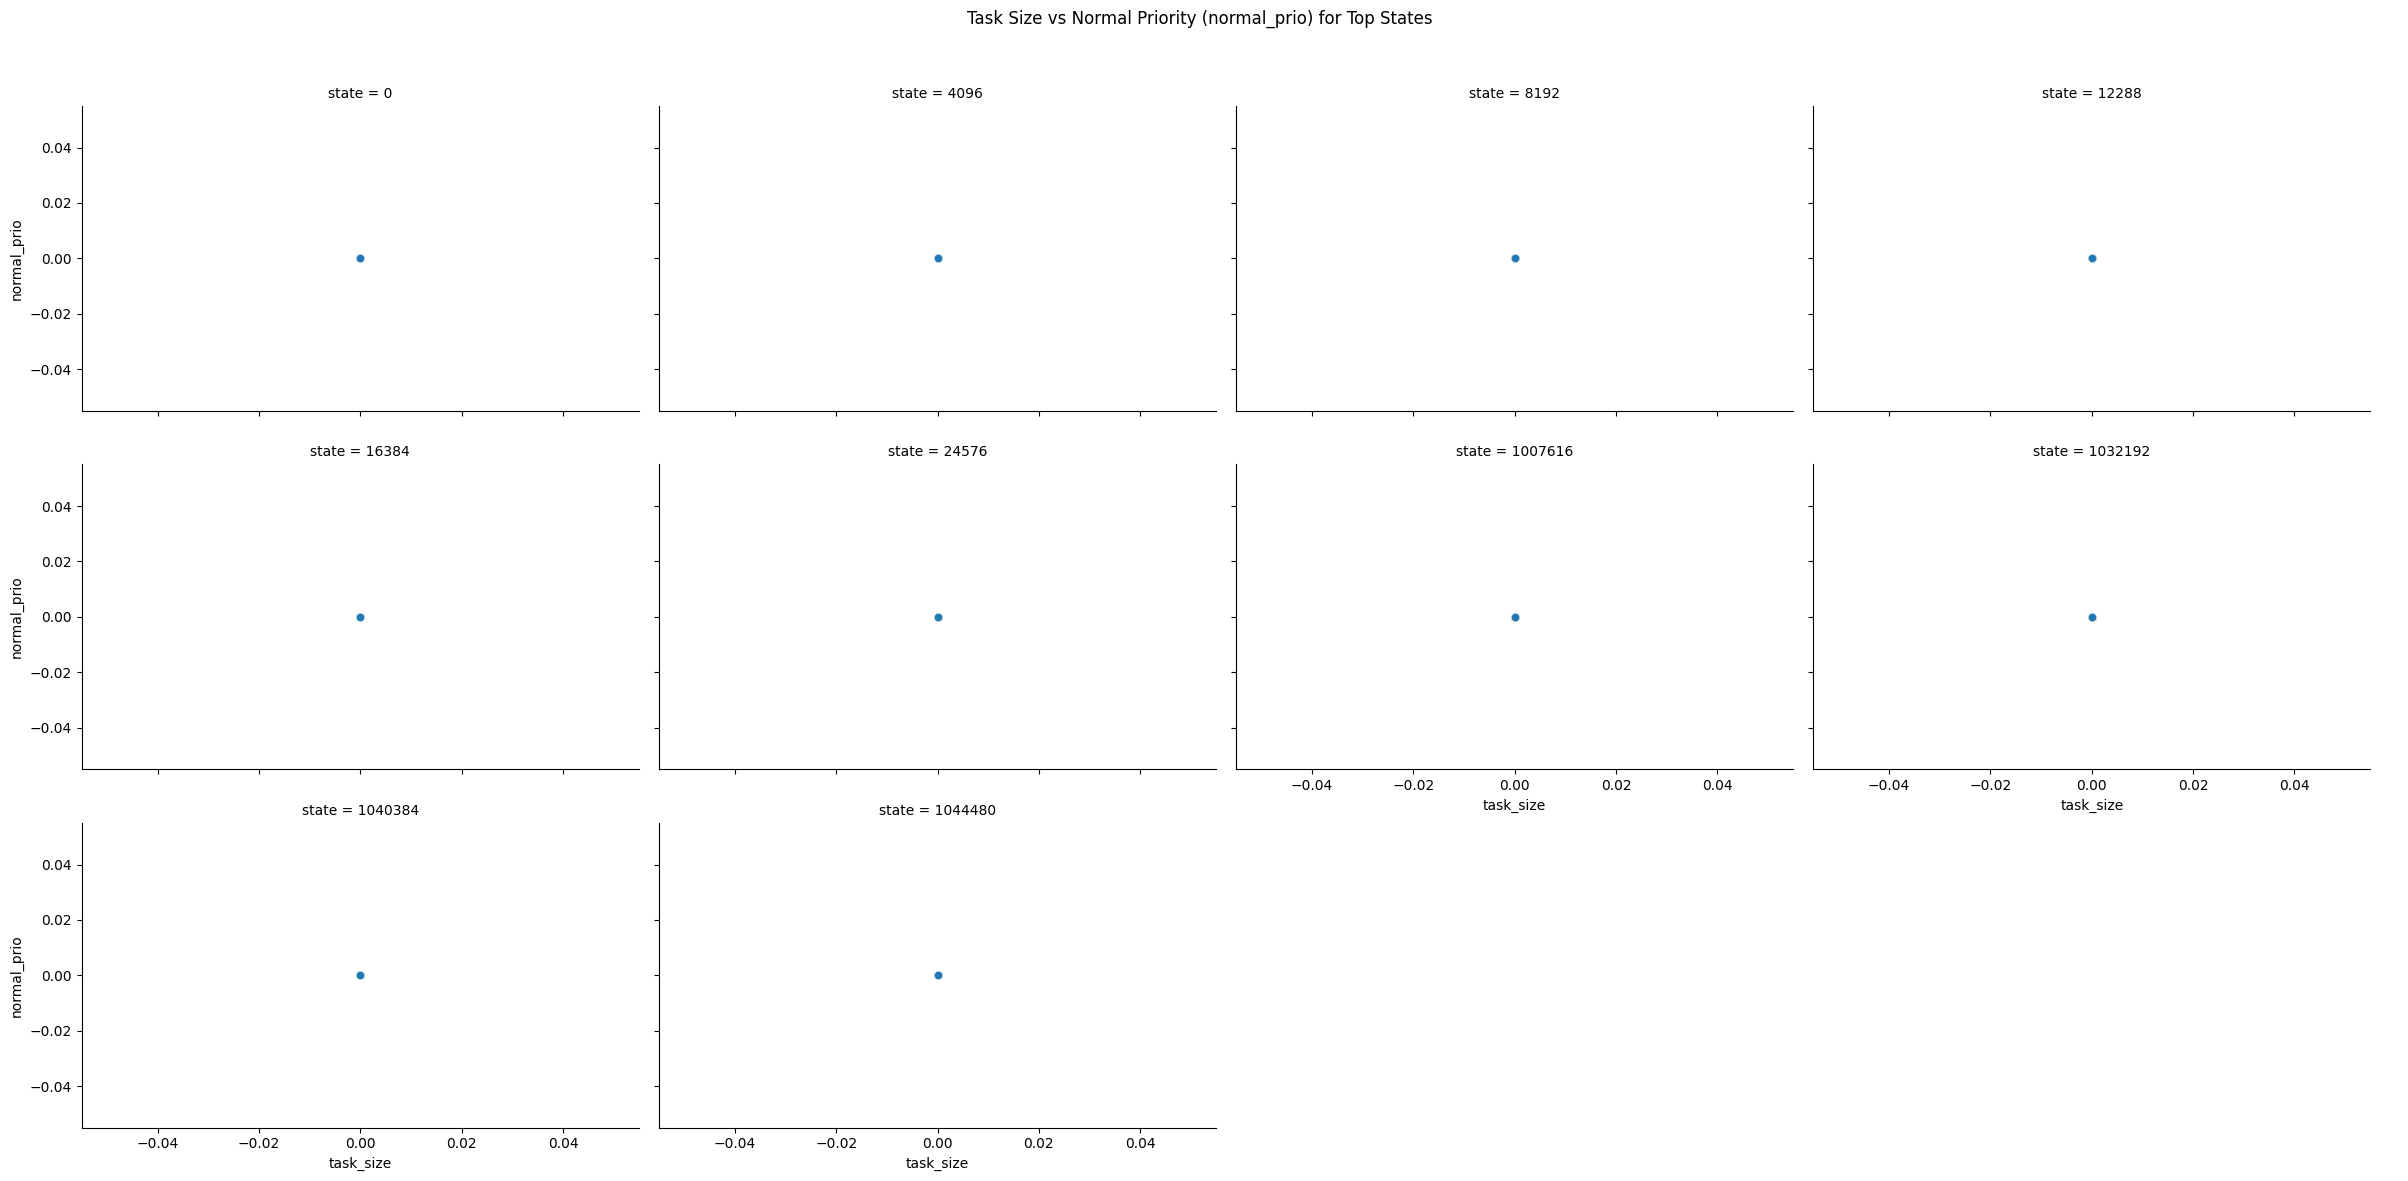

In [ ]:
# Find the top 10 most common states
top_states = df['state'].value_counts().nlargest(10).index

# Filter data for the top 10 states
df_top_states = df[df['state'].isin(top_states)]

# Downsample the data for plotting
df_sample = df_top_states.sample(frac=0.1, random_state=42)  # Using 10% of the data

# Facet grid for task_size vs priorities, colored by state
g = sns.FacetGrid(df_sample, col='state', col_wrap=4, height=4, aspect=1.5)
g.map(sns.scatterplot, 'task_size', 'prio', alpha=0.5)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Task Size vs Dynamic Priority (prio) for Top States')
plt.show()

g = sns.FacetGrid(df_sample, col='state', col_wrap=4, height=4, aspect=1.5)
g.map(sns.scatterplot, 'task_size', 'static_prio', alpha=0.5)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Task Size vs Static Priority (static_prio) for Top States')
plt.show()

g = sns.FacetGrid(df_sample, col='state', col_wrap=4, height=4, aspect=1.5)
g.map(sns.scatterplot, 'task_size', 'normal_prio', alpha=0.5)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Task Size vs Normal Priority (normal_prio) for Top States')
plt.show()


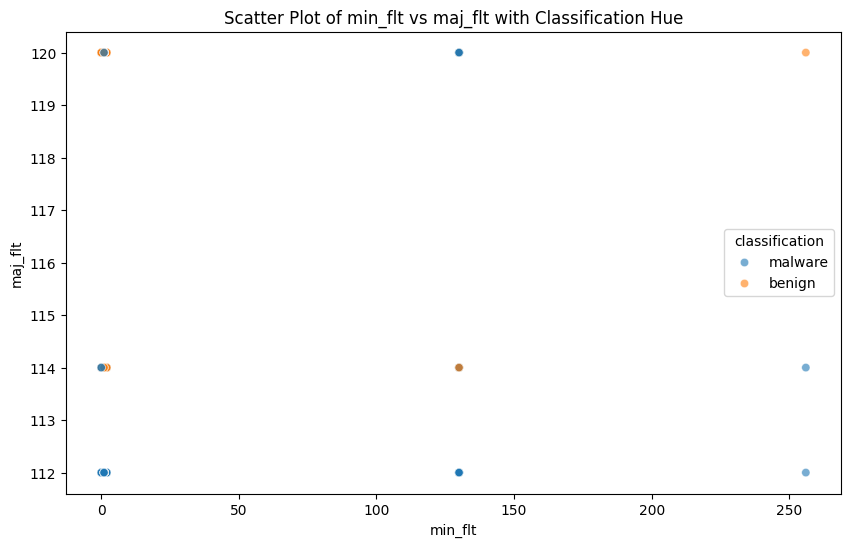

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_flt', y='maj_flt', data=df_sample, hue='classification', alpha=0.6)
plt.title('Scatter Plot of min_flt vs maj_flt with Classification Hue')
plt.show()


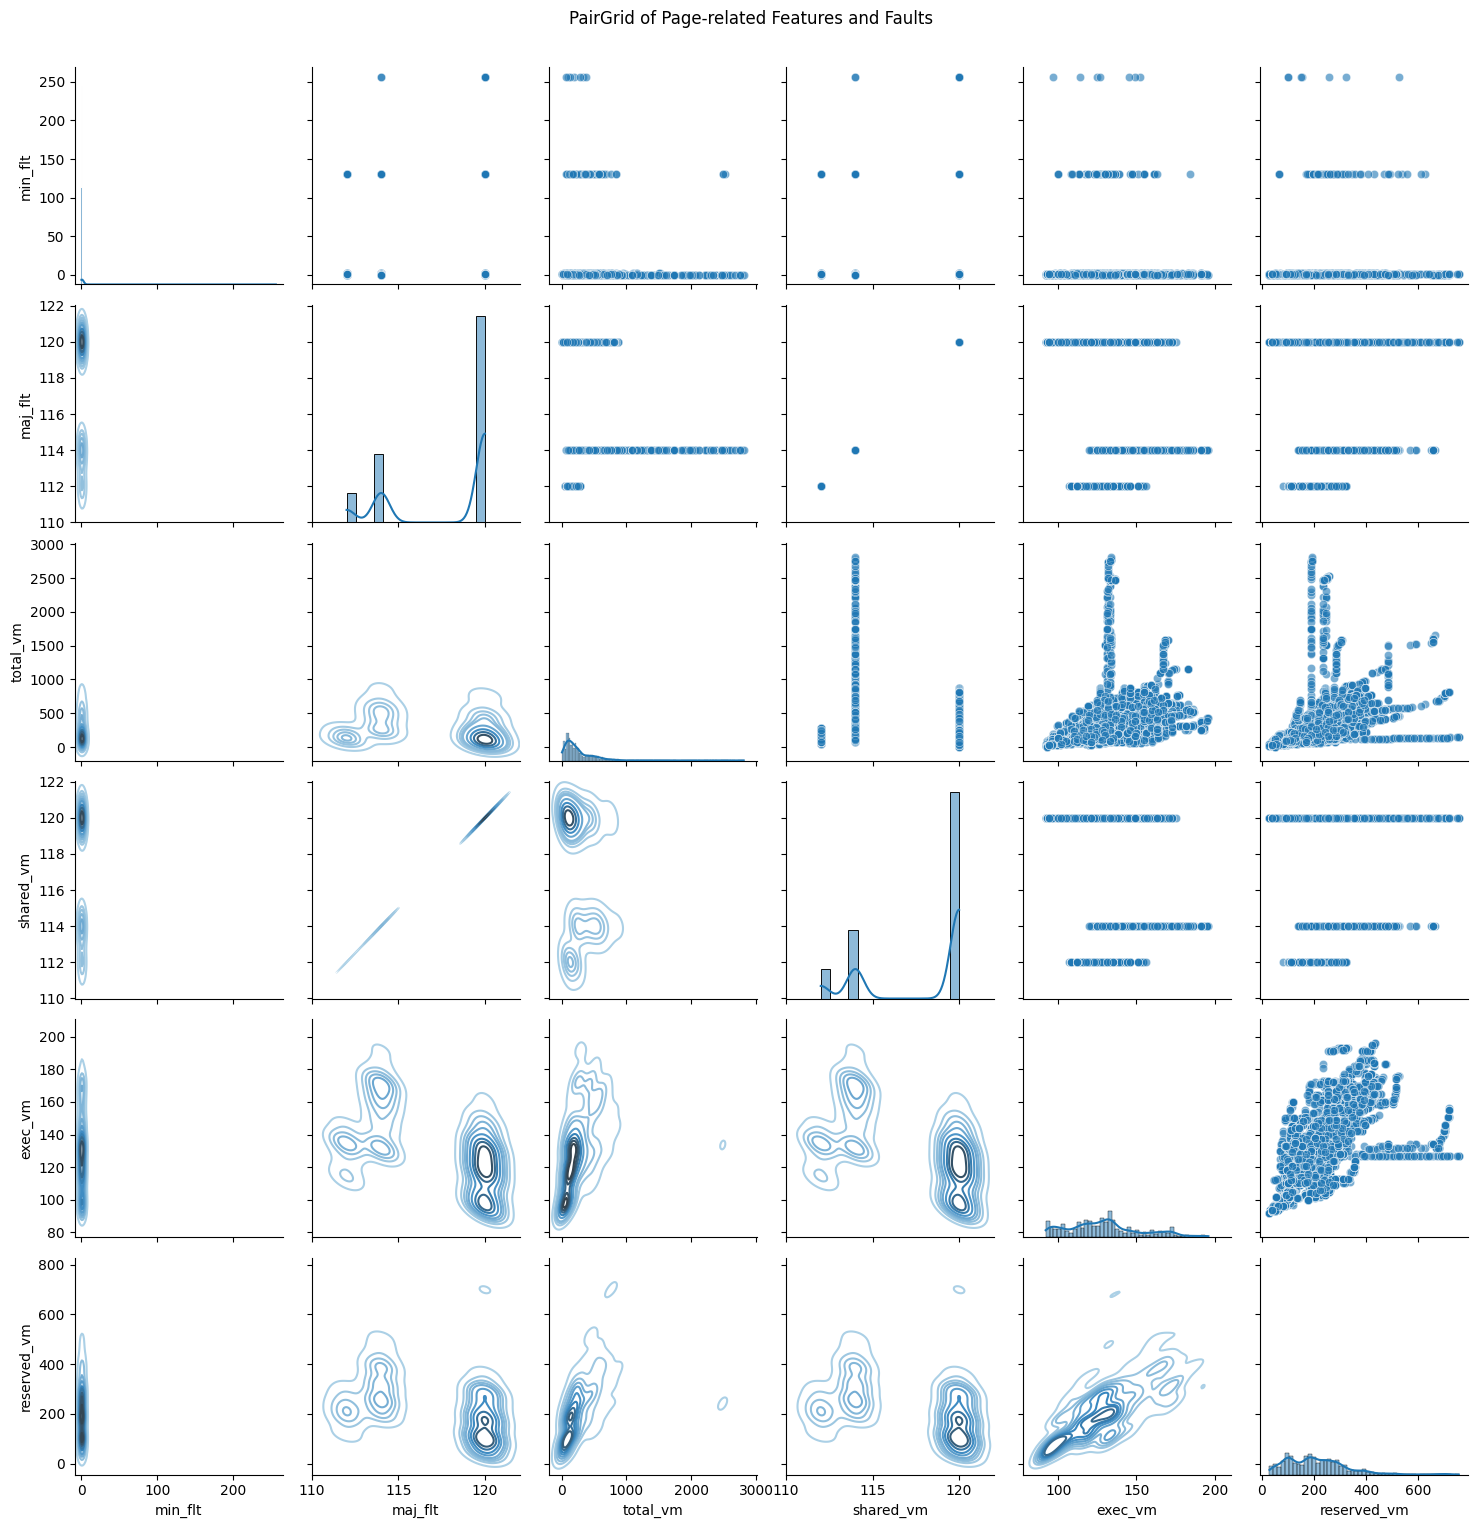

In [ ]:
df_sample = df.sample(frac=0.1, random_state=42)
# Select relevant columns
pairgrid_columns = ['min_flt', 'maj_flt', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm']

# Create PairGrid
g = sns.PairGrid(df_sample[pairgrid_columns])
g = g.map_upper(sns.scatterplot, alpha=0.6)
g = g.map_lower(sns.kdeplot, cmap='Blues_d')
g = g.map_diag(sns.histplot, kde=True)
plt.suptitle('PairGrid of Page-related Features and Faults', y=1.02)
plt.show()


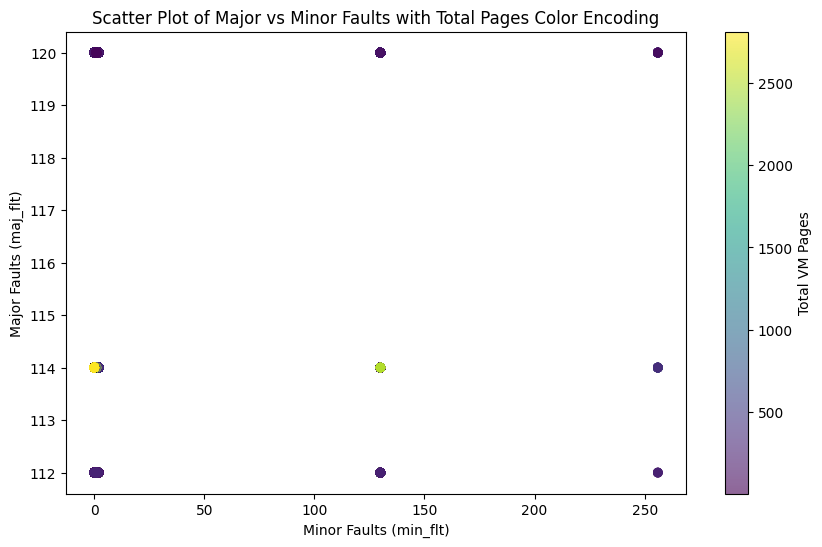

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['min_flt'], df['maj_flt'], c=df['total_vm'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Total VM Pages')
plt.xlabel('Minor Faults (min_flt)')
plt.ylabel('Major Faults (maj_flt)')
plt.title('Scatter Plot of Major vs Minor Faults with Total Pages Color Encoding')
plt.show()


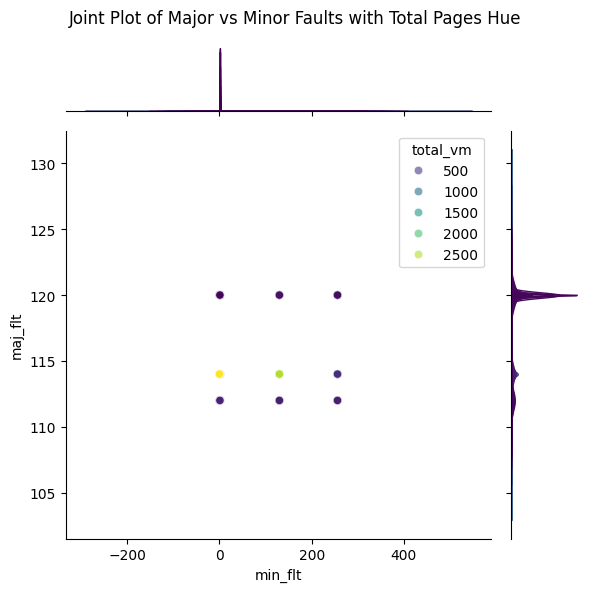

In [ ]:
# Create a joint plot
g = sns.jointplot(data=df, x='min_flt', y='maj_flt', hue='total_vm', palette='viridis', alpha=0.6)
g.fig.suptitle('Joint Plot of Major vs Minor Faults with Total Pages Hue')
g.fig.tight_layout()  # Adjust the layout
plt.show()


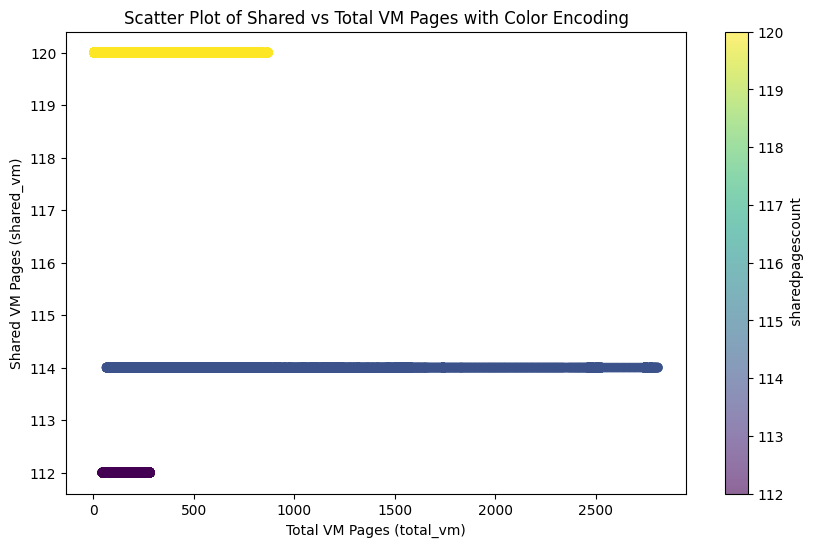

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['total_vm'], df['shared_vm'], c=df['shared_vm'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label=' sharedpagescount')
plt.xlabel('Total VM Pages (total_vm)')
plt.ylabel('Shared VM Pages (shared_vm)')
plt.title('Scatter Plot of Shared vs Total VM Pages with Color Encoding')
plt.show()


# **Data Preprocessing**

**Outlier Removal**

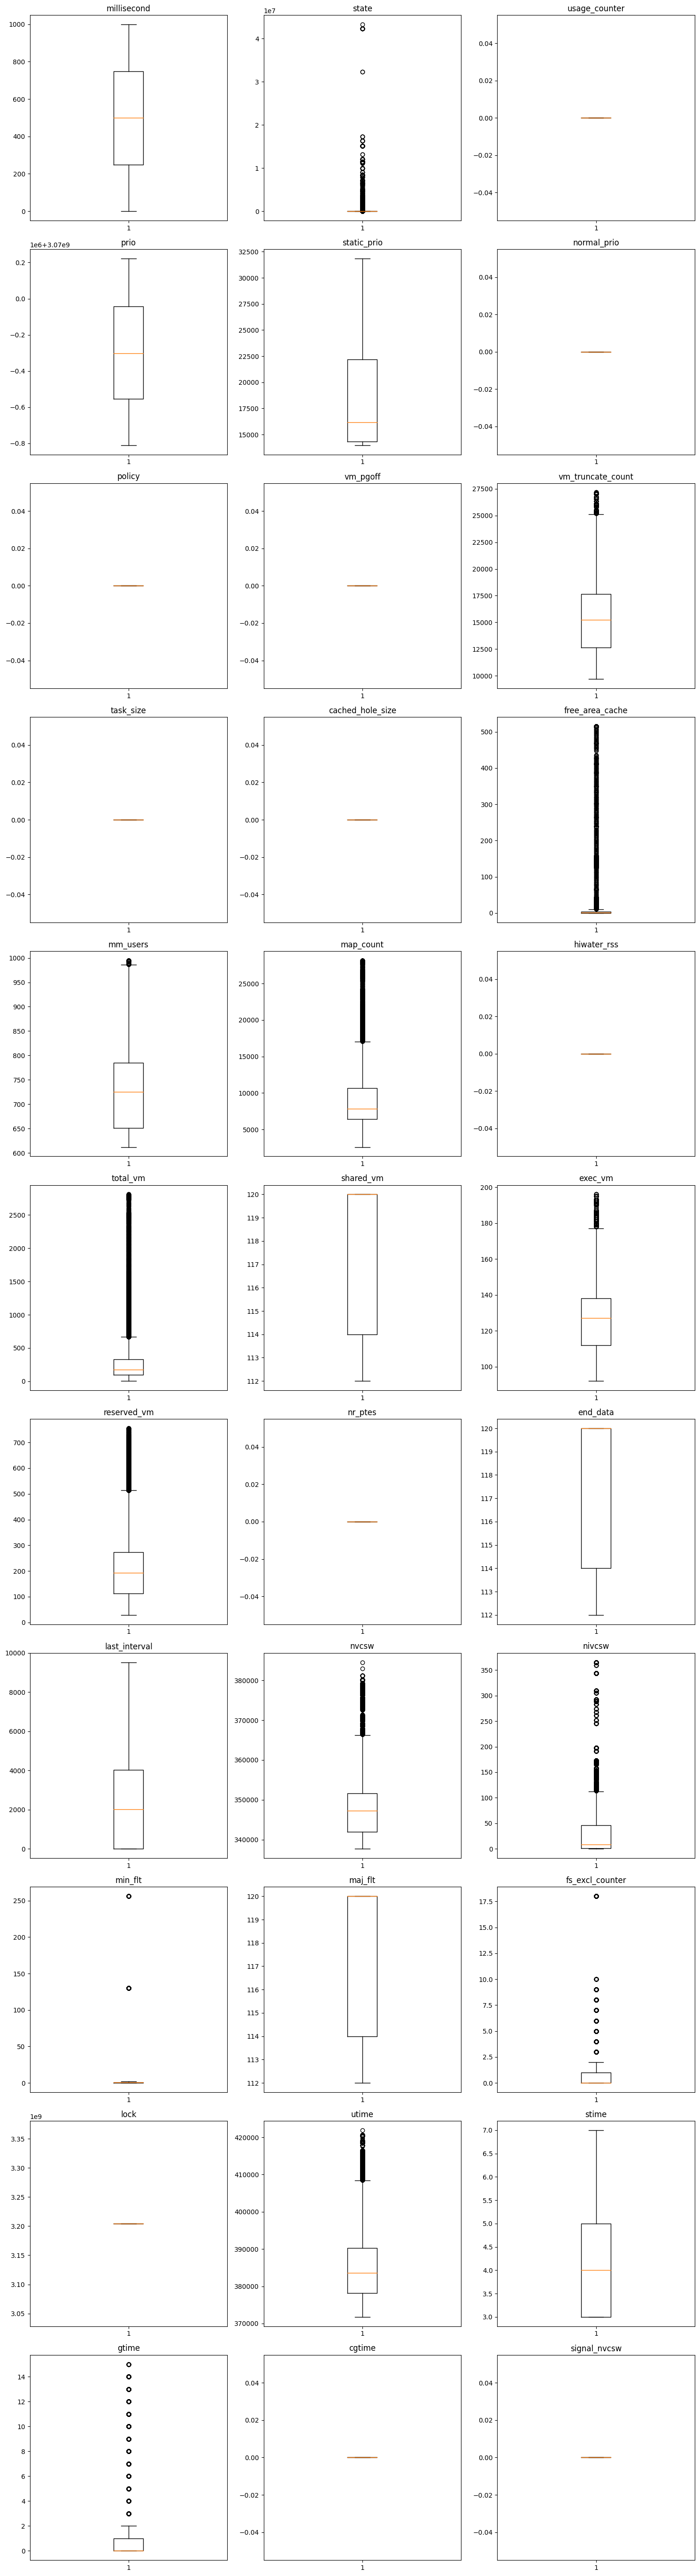

In [ ]:
import math

numeric_columns = df.select_dtypes(include=['int', 'float']).columns
num_plots = len(numeric_columns)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_columns):
    row = i // plots_per_row
    col_index = i % plots_per_row
    axs[row, col_index].boxplot(df[col])
    axs[row, col_index].set_title(col)

plt.tight_layout()
plt.show()


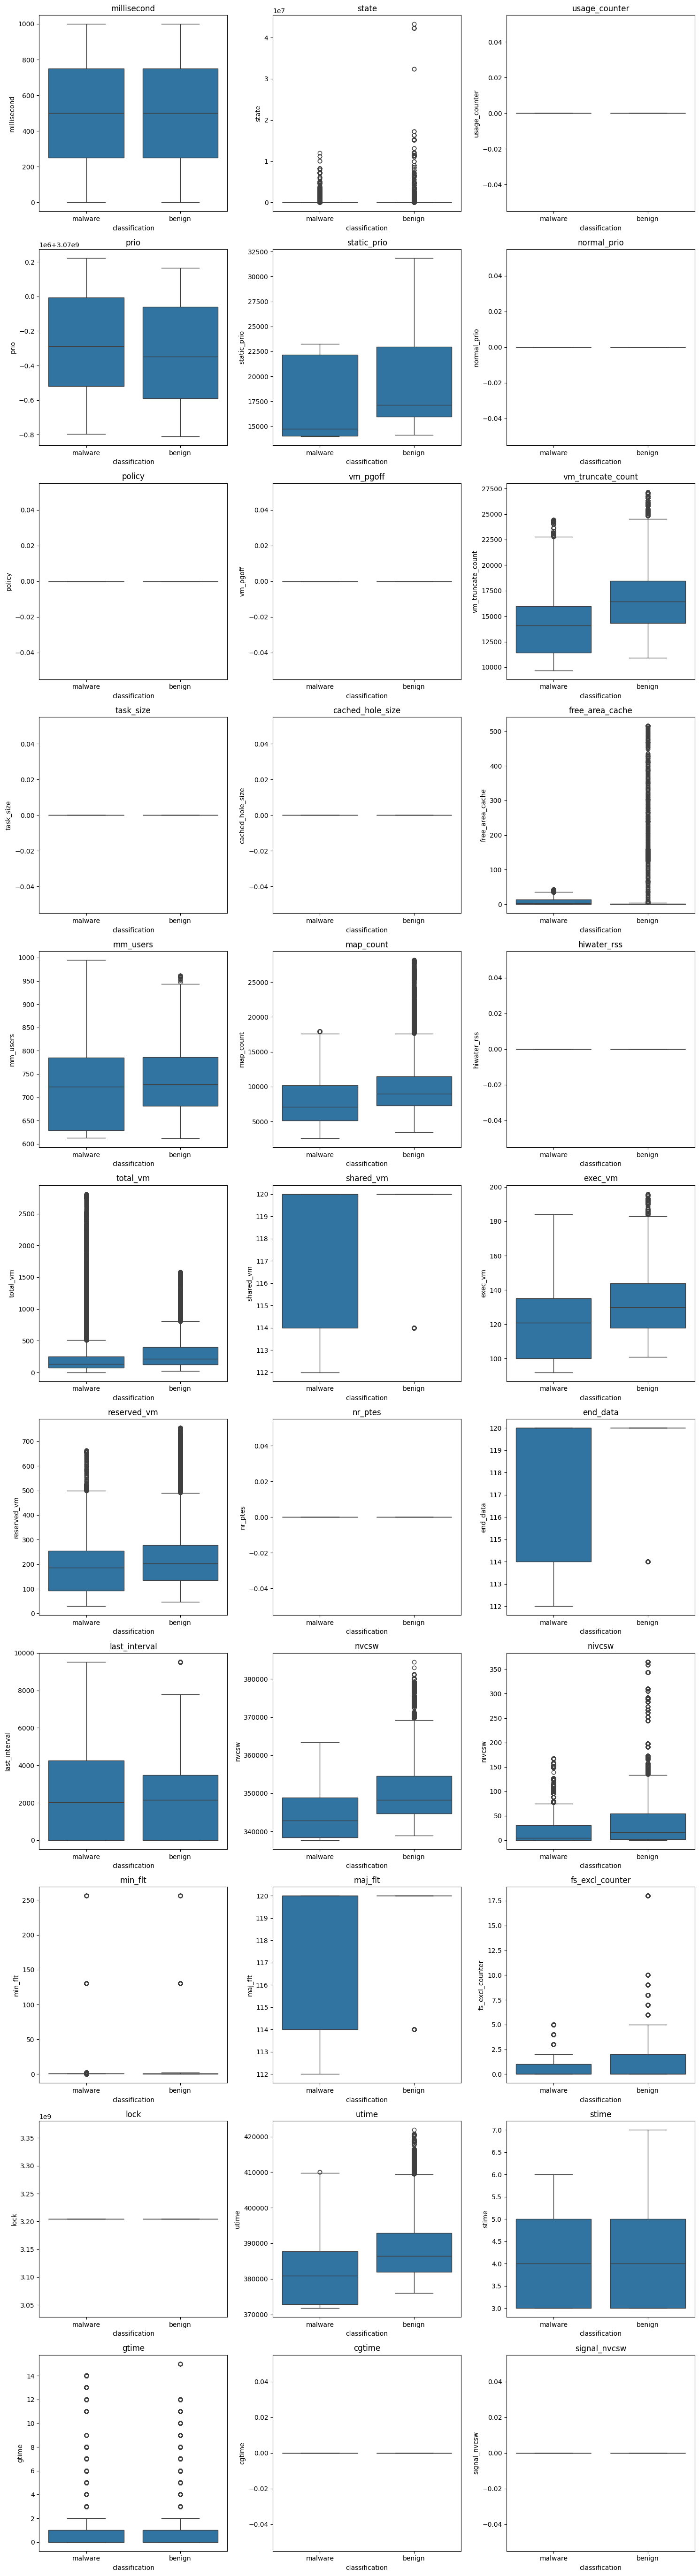

In [ ]:
import math

numeric_columns = df.select_dtypes(include=['int', 'float']).columns
num_plots = len(numeric_columns)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_columns):
    row = i // plots_per_row
    col_index = i % plots_per_row
    sns.boxplot(x='classification', y=col, data=df, ax=axs[row, col_index])
    axs[row, col_index].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print('after outlier removal',df.shape)

after outlier removal (50458, 35)


In [ ]:
outliers=['state','vm_truncate_count','free_area_cache','mm_users','map_count','total_vm','shared_vm','exec_vm','reserved_vm','end_data','last_interval','nvcsw','nivcsw','min_flt','maj_flt','fs_excl_counter','utime','gtime']

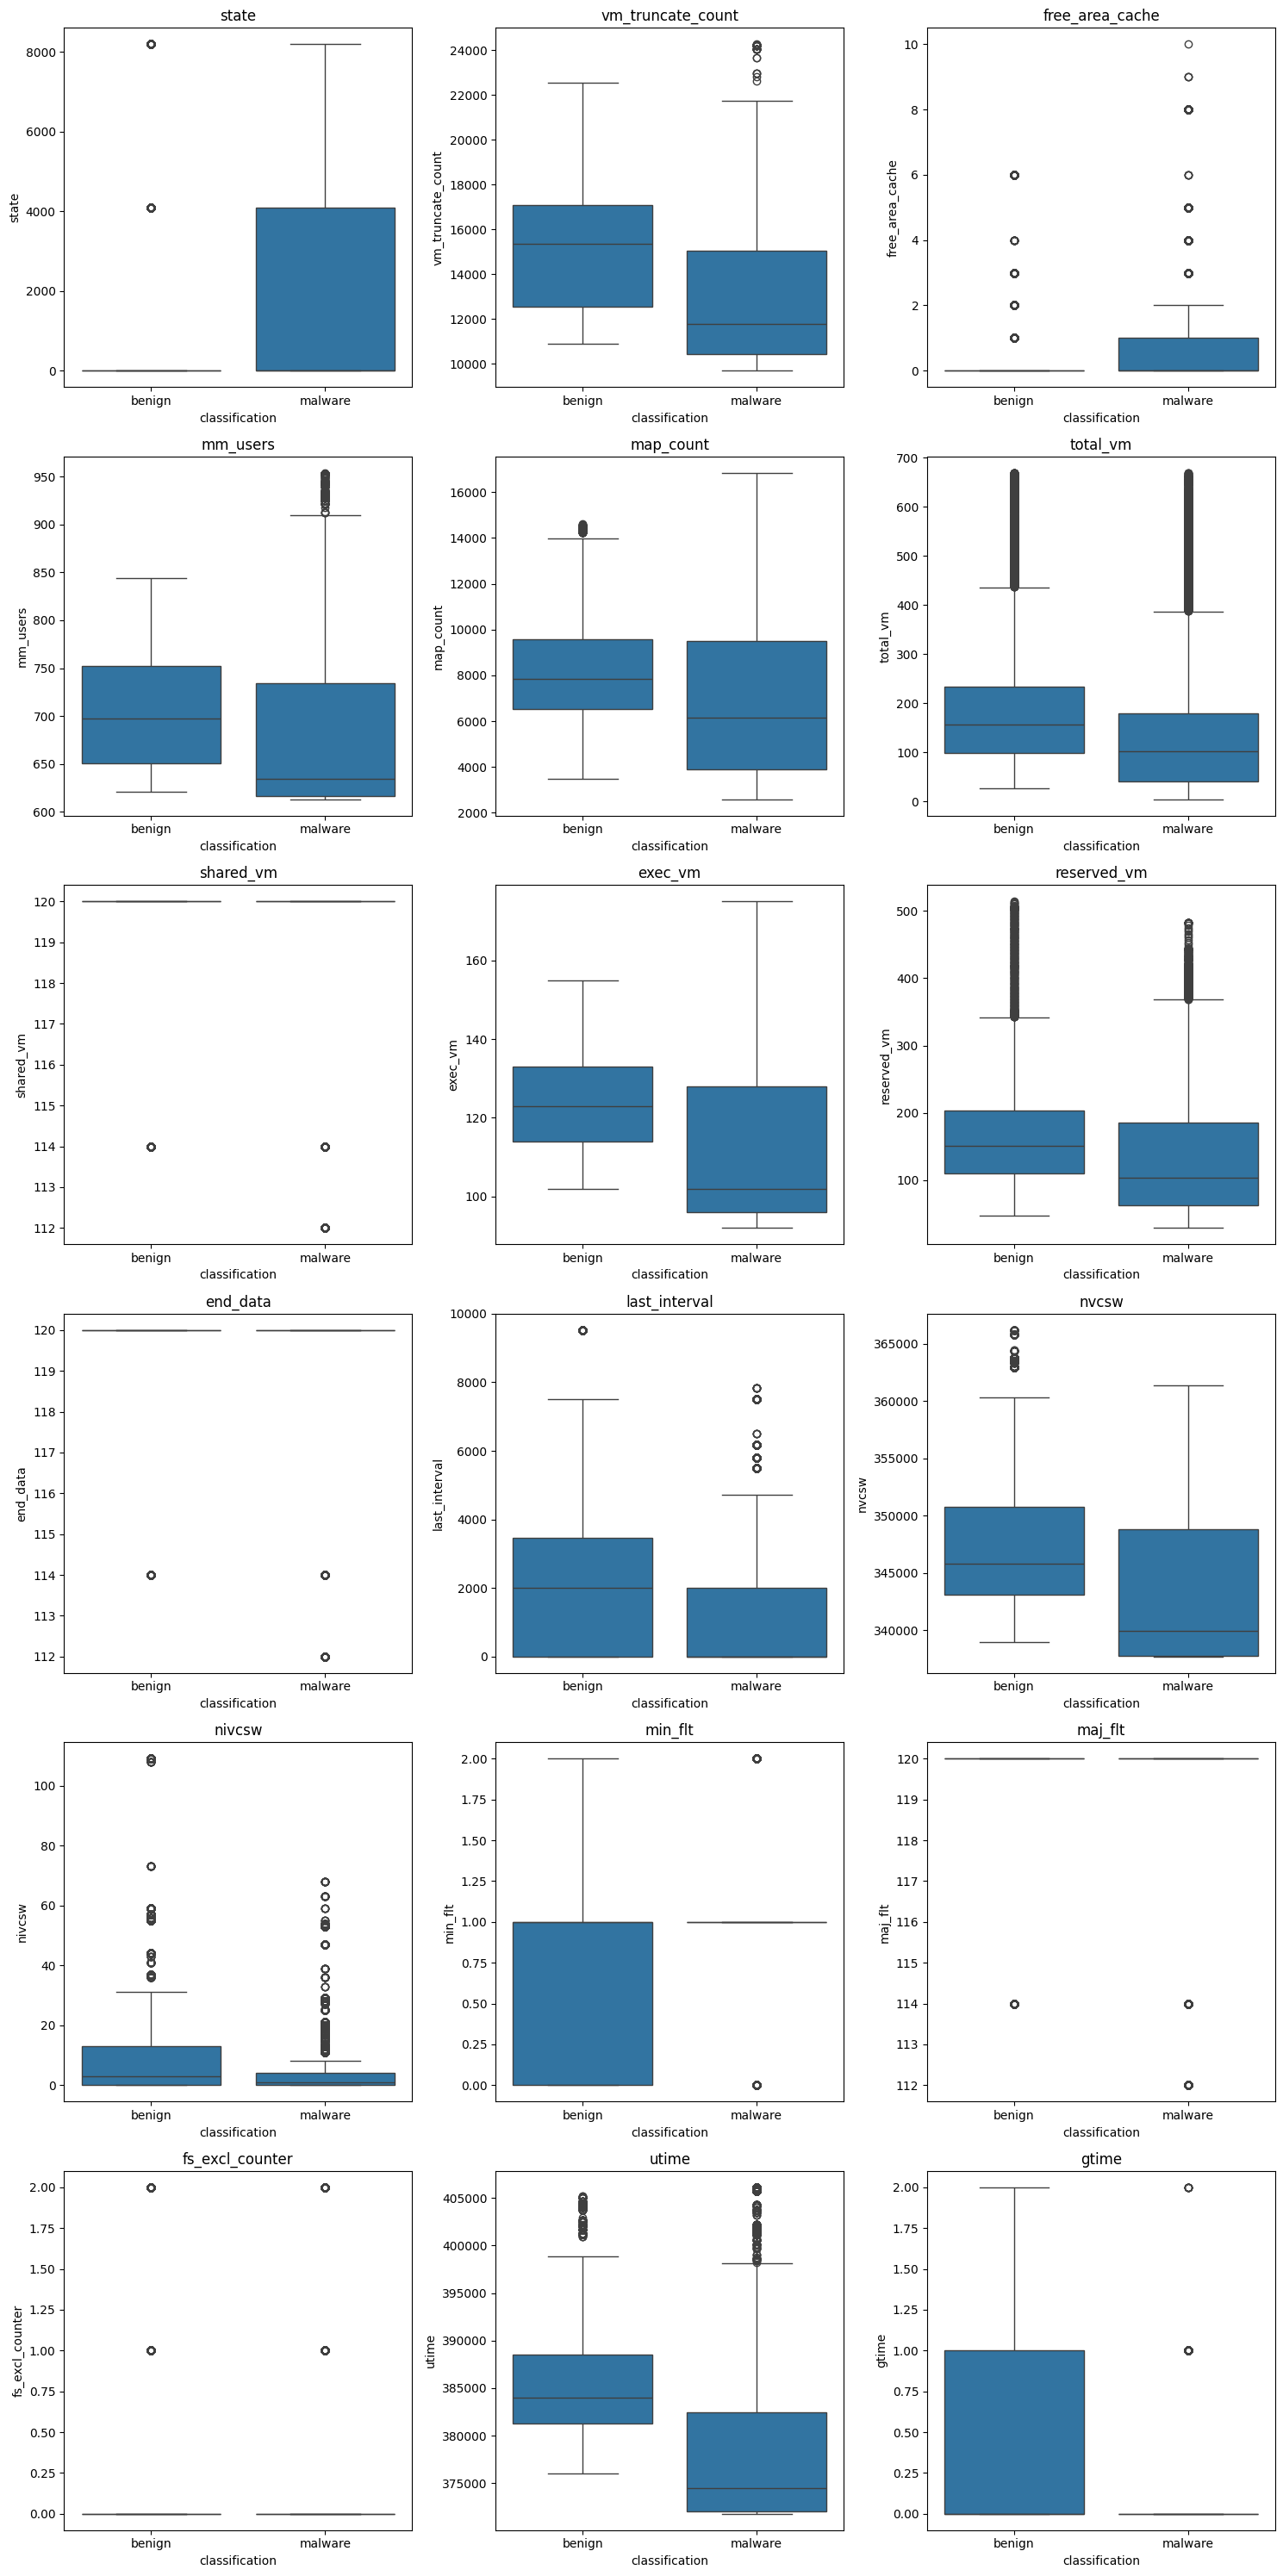

In [ ]:
num_plots = len(outliers)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(outliers):
    row = i // plots_per_row
    col_index = i % plots_per_row
    sns.boxplot(x='classification', y=col, data=df, ax=axs[row, col_index])
    axs[row, col_index].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
outliers_still=['state','vm_truncate_count','free_area_cache','mm_users','map_count','total_vm','shared_vm','reserved_vm','end_data','last_interval','nvcsw','nivcsw','min_flt','maj_flt','fs_excl_counter','utime','gtime']

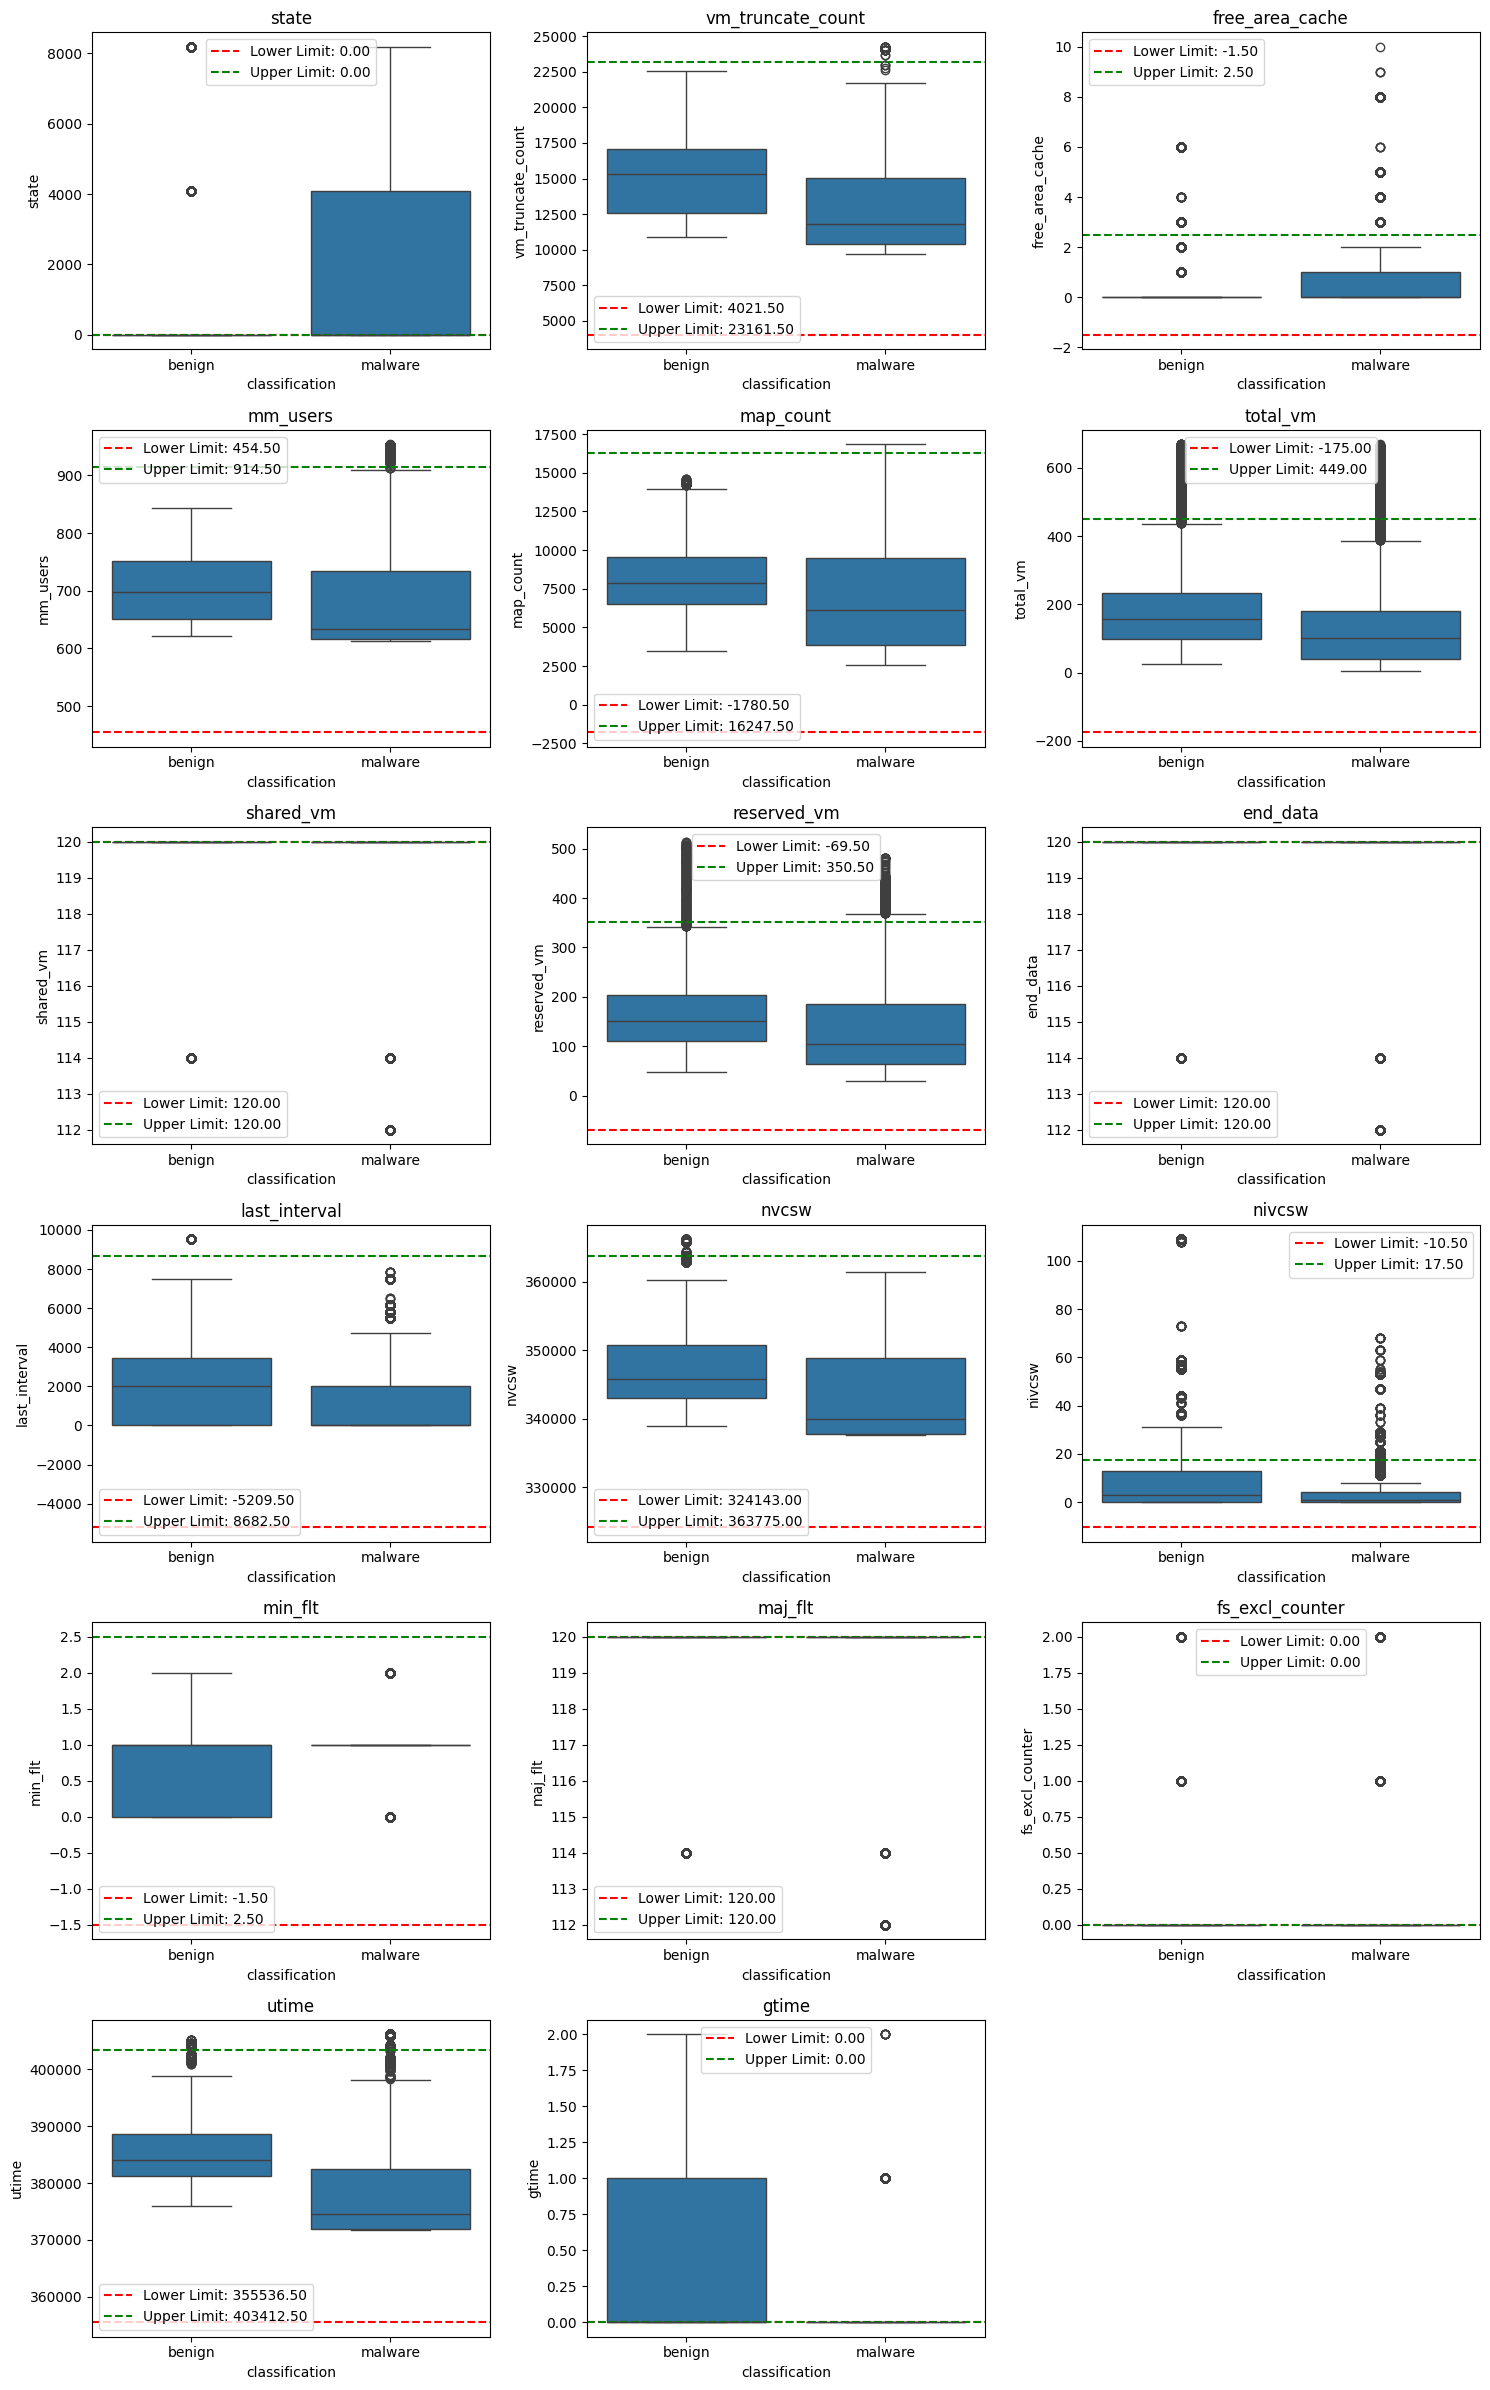

In [ ]:
# Create subplots
num_features = len(outliers_still)
num_cols = 3  # Adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes if necessary
if num_rows > 1:
    axs = axs.flatten()

# Plot boxplots for each feature
for i, col in enumerate(outliers_still):
    sns.boxplot(x='classification', y=col, data=df, ax=axs[i])

    # Calculate the lower and upper limits
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Display the lower and upper limits
    axs[i].axhline(lower_limit, color='red', linestyle='--', label=f'Lower Limit: {lower_limit:.2f}')
    axs[i].axhline(upper_limit, color='green', linestyle='--', label=f'Upper Limit: {upper_limit:.2f}')
    axs[i].legend()

    axs[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
outliers_still_actual=['vm_truncate_count','free_area_cache','mm_users','total_vm','reserved_vm','last_interval','nvcsw','nivcsw','utime']

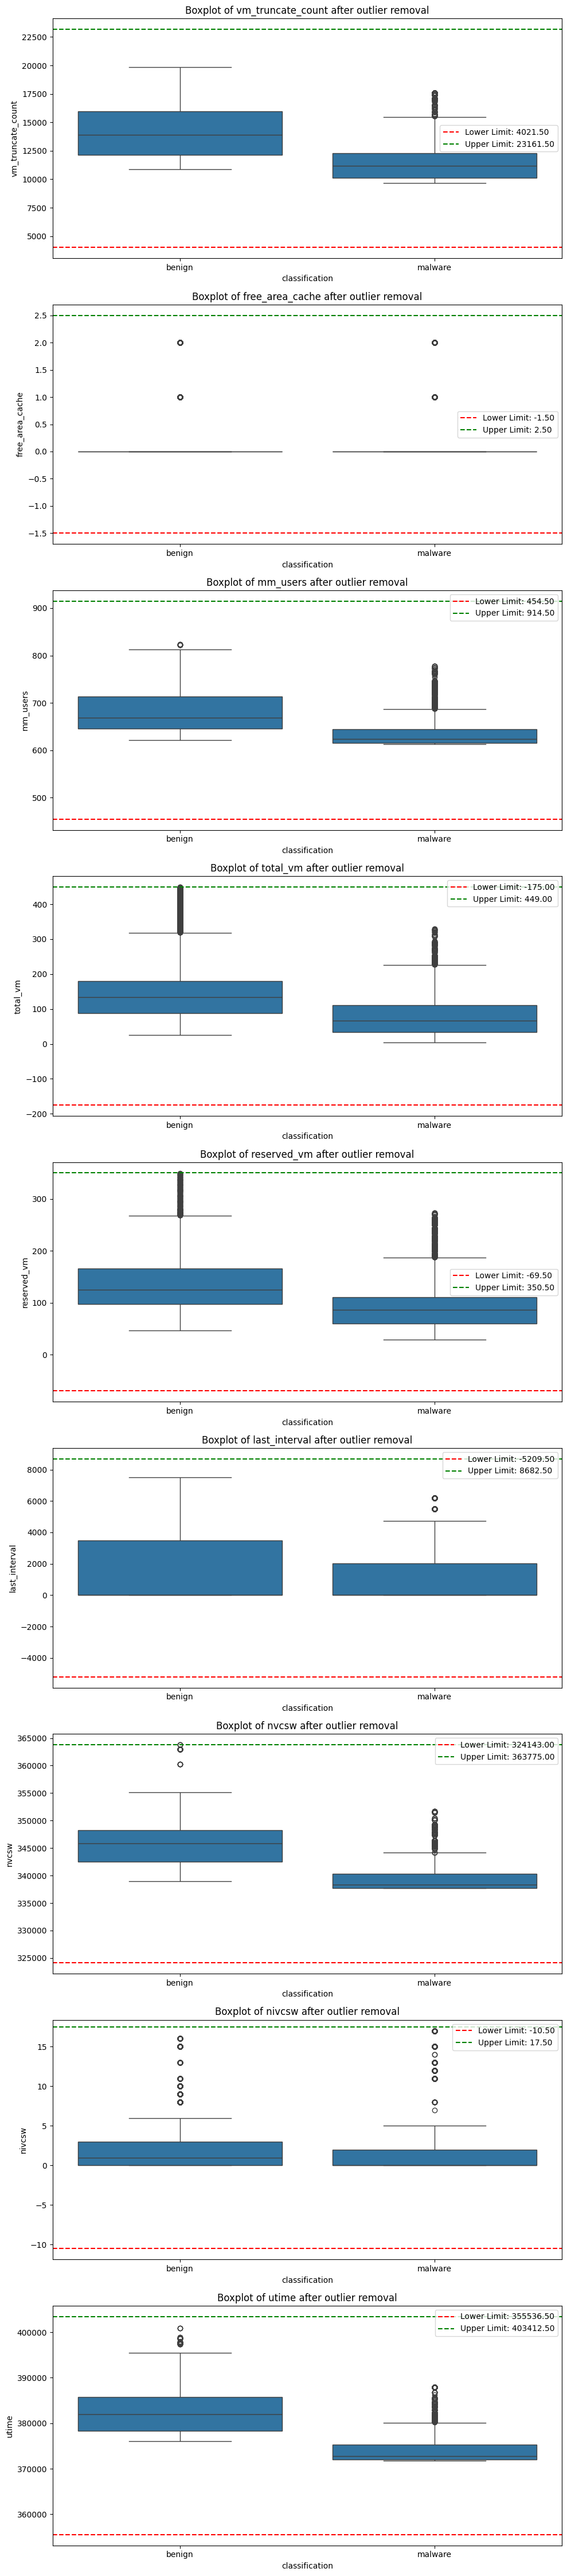

In [ ]:
# Calculate lower and upper bounds for each column
lower_bounds = df[outliers_still_actual].quantile(0.25) - 1.5 * (df[outliers_still_actual].quantile(0.75) - df[outliers_still_actual].quantile(0.25))
upper_bounds = df[outliers_still_actual].quantile(0.75) + 1.5 * (df[outliers_still_actual].quantile(0.75) - df[outliers_still_actual].quantile(0.25))

# Filter DataFrame to remove outliers
for col in outliers_still_actual:
    df = df[(df[col] >= lower_bounds[col]) & (df[col] <= upper_bounds[col])]

# Create a figure and axis object
fig, axs = plt.subplots(len(outliers_still_actual), 1, figsize=(10, 5*len(outliers_still_actual)))

# Plot boxplots after outlier removal
for i, col in enumerate(outliers_still_actual):
    sns.boxplot(x='classification', y=col, data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} after outlier removal')

    # Plot lower and upper limit lines
    lower_limit = lower_bounds[col]
    upper_limit = upper_bounds[col]
    axs[i].axhline(lower_limit, color='red', linestyle='--', label=f'Lower Limit: {lower_limit:.2f}')
    axs[i].axhline(upper_limit, color='green', linestyle='--', label=f'Upper Limit: {upper_limit:.2f}')
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# **Feature Selection**

**Droping 'hash' since it represents filename-It doesn't give any contribution**

In [ ]:
df.drop(['hash'],axis=1,inplace=True)
df

millisecond classification  state  usage_counter        prio  \
1000             0         benign      0              0  3069403136   
1001             1         benign      0              0  3069403136   
1002             2         benign      0              0  3069403136   
1003             3         benign      0              0  3069403136   
1004             4         benign      0              0  3069403136   
...            ...            ...    ...            ...         ...   
99995          995        malware   4096              0  3070148608   
99996          996        malware   4096              0  3070148608   
99997          997        malware   4096              0  3070148608   
99998          998        malware   4096              0  3070148608   
99999          999        malware   4096              0  3070148608   

       static_prio  normal_prio  policy  vm_pgoff  vm_truncate_count  ...  \
1000         16447            0       0         0              14739  ...   
1001         16447            0       0         0              14739  ...   
1002         16447            0       0         0              14739  ...   
1003         16447            0       0         0              14739  ...   
1004         16447            0       0         0              14739  ...   
...            ...          ...     ...       ...                ...  ...   
99995        13988            0       0         0              10406  ...   
99996        13988            0       0         0              10406  ...   
99997        13988            0       0         0              10406  ...   
99998        13988            0       0         0              10406  ...   
99999        13988            0       0         0              10406  ...   

       nivcsw  min_flt  maj_flt  fs_excl_counter        lock   utime  stime  \
1000        0        1      120                0  3204448256  384502      5   
1001        0        1      120                0  3204448256  384502      5   
1002        0        1      120                0  3204448256  384502      5   
1003        0        1      120                0  3204448256  384502      5   
1004        0        1      120                0  3204448256  384502      5   
...       ...      ...      ...              ...         ...     ...    ...   
99995       2        1      120                0  3204448256  371979      3   
99996       2        1      120                0  3204448256  371979      3   
99997       2        1      120                0  3204448256  371979      3   
99998       2        1      120                0  3204448256  371979      3   
99999       2        1      120                0  3204448256  371979      3   

       gtime  cgtime  signal_nvcsw  
1000       0       0             0  
1001       0       0             0  
1002       0       0             0  
1003       0       0             0  
1004       0       0             0  
...      ...     ...           ...  
99995      0       0             0  
99996      0       0             0  
99997      0       0             0  
99998      0       0             0  
99999      0       0             0  

[35126 rows x 34 columns]

In [ ]:
df['classification']=df['classification'].map({'malware':1,'benign':0})

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df[numeric_columns].corr()

millisecond  classification     state  usage_counter  \
millisecond           1.000000        0.046454 -0.001018            NaN   
classification        0.046454        1.000000  0.239717            NaN   
state                -0.001018        0.239717  1.000000            NaN   
usage_counter              NaN             NaN       NaN            NaN   
prio                 -0.000447        0.264785  0.164916            NaN   
static_prio          -0.107346       -0.578838 -0.142515            NaN   
normal_prio                NaN             NaN       NaN            NaN   
policy                     NaN             NaN       NaN            NaN   
vm_pgoff                   NaN             NaN       NaN            NaN   
vm_truncate_count     0.009808       -0.555829 -0.107303            NaN   
task_size                  NaN             NaN       NaN            NaN   
cached_hole_size           NaN             NaN       NaN            NaN   
free_area_cache      -0.086203        0.201467 -0.025594            NaN   
mm_users              0.022103       -0.450914 -0.028840            NaN   
map_count             0.005998       -0.497261 -0.237781            NaN   
hiwater_rss                NaN             NaN       NaN            NaN   
total_vm              0.135030       -0.434500 -0.078588            NaN   
shared_vm             0.140558       -0.118866  0.009916            NaN   
exec_vm              -0.011288       -0.635956 -0.131918            NaN   
reserved_vm          -0.040896       -0.362402 -0.113564            NaN   
nr_ptes                    NaN             NaN       NaN            NaN   
end_data              0.140558       -0.118866  0.009916            NaN   
last_interval         0.078778       -0.218459 -0.107950            NaN   
nvcsw                -0.033898       -0.615573 -0.164995            NaN   
nivcsw               -0.183900       -0.153585  0.062554            NaN   
min_flt               0.024896        0.165556  0.012173            NaN   
maj_flt               0.140558       -0.118866  0.009916            NaN   
fs_excl_counter       0.023817       -0.050404 -0.086442            NaN   
lock                       NaN             NaN       NaN            NaN   
utime                 0.011240       -0.686739 -0.162929            NaN   
stime                 0.044171       -0.210152 -0.100585            NaN   
gtime                -0.054684       -0.247082  0.048081            NaN   
cgtime                     NaN             NaN       NaN            NaN   
signal_nvcsw               NaN             NaN       NaN            NaN   

                       prio  static_prio  normal_prio  policy  vm_pgoff  \
millisecond       -0.000447    -0.107346          NaN     NaN       NaN   
classification     0.264785    -0.578838          NaN     NaN       NaN   
state              0.164916    -0.142515          NaN     NaN       NaN   
usage_counter           NaN          NaN          NaN     NaN       NaN   
prio               1.000000    -0.208300          NaN     NaN       NaN   
static_prio       -0.208300     1.000000          NaN     NaN       NaN   
normal_prio             NaN          NaN          NaN     NaN       NaN   
policy                  NaN          NaN          NaN     NaN       NaN   
vm_pgoff                NaN          NaN          NaN     NaN       NaN   
vm_truncate_count -0.322394     0.465693          NaN     NaN       NaN   
task_size               NaN          NaN          NaN     NaN       NaN   
cached_hole_size        NaN          NaN          NaN     NaN       NaN   
free_area_cache    0.008901     0.072526          NaN     NaN       NaN   
mm_users          -0.227561     0.405587          NaN     NaN       NaN   
map_count         -0.342008     0.635630          NaN     NaN       NaN   
hiwater_rss             NaN          NaN          NaN     NaN       NaN   
total_vm          -0.198440     0.562001          NaN     NaN       NaN   
shared_vm          0.000451    -0.158648   

**Checking std of feature with 0 and droping them**

In [ ]:
df[numeric_columns].std()==0

millisecond          False
classification       False
state                False
usage_counter         True
prio                 False
static_prio          False
normal_prio           True
policy                True
vm_pgoff              True
vm_truncate_count    False
task_size             True
cached_hole_size      True
free_area_cache      False
mm_users             False
map_count            False
hiwater_rss           True
total_vm             False
shared_vm            False
exec_vm              False
reserved_vm          False
nr_ptes               True
end_data             False
last_interval        False
nvcsw                False
nivcsw               False
min_flt              False
maj_flt              False
fs_excl_counter      False
lock                  True
utime                False
stime                False
gtime                False
cgtime                True
signal_nvcsw          True
dtype: bool

In [ ]:
zero_std_columns = df[numeric_columns].columns[df[numeric_columns].std() == 0]

zero_std_columns

Index(['usage_counter', 'normal_prio', 'policy', 'vm_pgoff', 'task_size',
       'cached_hole_size', 'hiwater_rss', 'nr_ptes', 'lock', 'cgtime',
       'signal_nvcsw'],
      dtype='object')

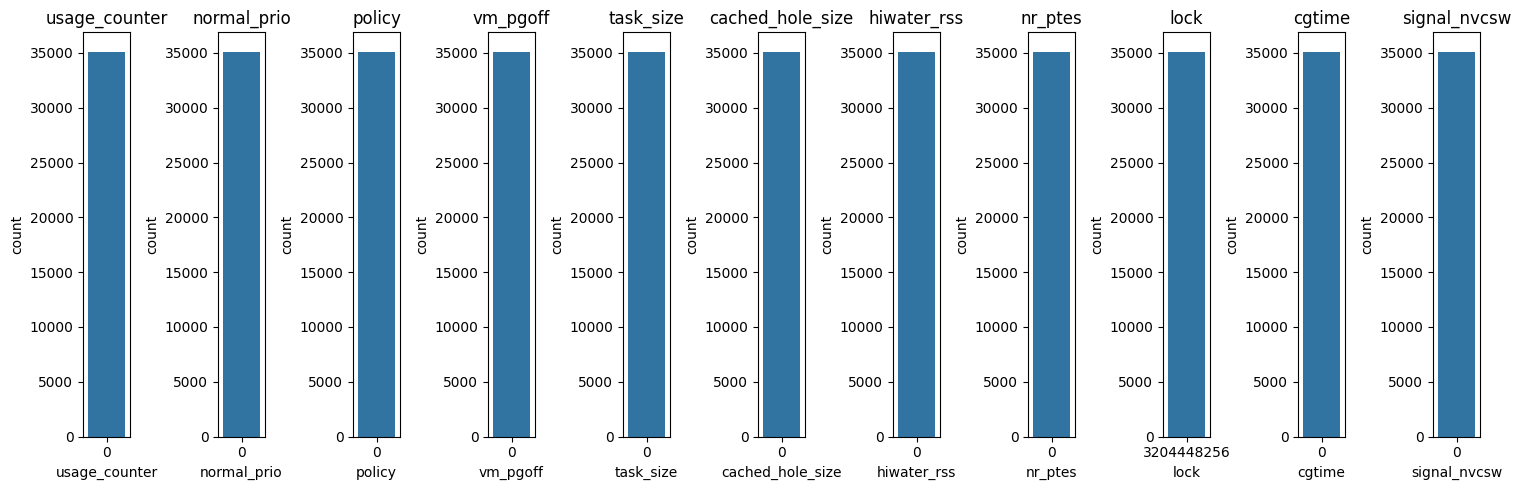

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(zero_std_columns), figsize=(15, 5))

# Plot countplots for each column in zero_std_columns
for i, col in enumerate(zero_std_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
df.drop(zero_std_columns,axis=1,inplace=True)
df

millisecond  classification  state        prio  static_prio  \
1000             0               0      0  3069403136        16447   
1001             1               0      0  3069403136        16447   
1002             2               0      0  3069403136        16447   
1003             3               0      0  3069403136        16447   
1004             4               0      0  3069403136        16447   
...            ...             ...    ...         ...          ...   
99995          995               1   4096  3070148608        13988   
99996          996               1   4096  3070148608        13988   
99997          997               1   4096  3070148608        13988   
99998          998               1   4096  3070148608        13988   
99999          999               1   4096  3070148608        13988   

       vm_truncate_count  free_area_cache  mm_users  map_count  total_vm  ...  \
1000               14739                0       682       7903        88  ...   
1001               14739                0       682       7903        88  ...   
1002               14739                0       682       7903        88  ...   
1003               14739                0       682       7903        88  ...   
1004               14739                0       682       7903        88  ...   
...                  ...              ...       ...        ...       ...  ...   
99995              10406                0       616       3651        40  ...   
99996              10406                0       616       3651        40  ...   
99997              10406                0       616       3651        40  ...   
99998              10406                0       616       3651        40  ...   
99999              10406                0       616       3651        40  ...   

       end_data  last_interval   nvcsw  nivcsw  min_flt  maj_flt  \
1000        120           3475  349169       0        1      120   
1001        120           3475  349169       0        1      120   
1002        120           3475  349169       0        1      120   
1003        120           3475  349169       0        1      120   
1004        120           3475  349169       0        1      120   
...         ...            ...     ...     ...      ...      ...   
99995       120              0  337688       2        1      120   
99996       120              0  337688       2        1      120   
99997       120              0  337688       2        1      120   
99998       120              0  337688       2        1      120   
99999       120              0  337688       2        1      120   

       fs_excl_counter   utime  stime  gtime  
1000                 0  384502      5      0  
1001                 0  384502      5      0  
1002                 0  384502      5      0  
1003                 0  384502      5      0  
1004                 0  384502      5      0  
...                ...     ...    ...    ...  
99995                0  371979      3      0  
99996                0  371979      3      0  
99997                0  371979      3      0  
99998                0  371979      3      0  
99999                0  371979      3      0  

[35126 rows x 23 columns]

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df[numeric_columns].corr()

millisecond  classification     state      prio  \
millisecond           1.000000        0.046454 -0.001018 -0.000447   
classification        0.046454        1.000000  0.239717  0.264785   
state                -0.001018        0.239717  1.000000  0.164916   
prio                 -0.000447        0.264785  0.164916  1.000000   
static_prio          -0.107346       -0.578838 -0.142515 -0.208300   
vm_truncate_count     0.009808       -0.555829 -0.107303 -0.322394   
free_area_cache      -0.086203        0.201467 -0.025594  0.008901   
mm_users              0.022103       -0.450914 -0.028840 -0.227561   
map_count             0.005998       -0.497261 -0.237781 -0.342008   
total_vm              0.135030       -0.434500 -0.078588 -0.198440   
shared_vm             0.140558       -0.118866  0.009916  0.000451   
exec_vm              -0.011288       -0.635956 -0.131918 -0.330540   
reserved_vm          -0.040896       -0.362402 -0.113564 -0.081561   
end_data              0.140558       -0.118866  0.009916  0.000451   
last_interval         0.078778       -0.218459 -0.107950 -0.210211   
nvcsw                -0.033898       -0.615573 -0.164995 -0.362621   
nivcsw               -0.183900       -0.153585  0.062554 -0.141760   
min_flt               0.024896        0.165556  0.012173  0.033062   
maj_flt               0.140558       -0.118866  0.009916  0.000451   
fs_excl_counter       0.023817       -0.050404 -0.086442 -0.172857   
utime                 0.011240       -0.686739 -0.162929 -0.335370   
stime                 0.044171       -0.210152 -0.100585 -0.276742   
gtime                -0.054684       -0.247082  0.048081 -0.035479   

                   static_prio  vm_truncate_count  free_area_cache  mm_users  \
millisecond          -0.107346           0.009808        -0.086203  0.022103   
classification       -0.578838          -0.555829         0.201467 -0.450914   
state                -0.142515          -0.107303        -0.025594 -0.028840   
prio                 -0.208300          -0.322394         0.008901 -0.227561   
static_prio           1.000000           0.465693         0.072526  0.405587   
vm_truncate_count     0.465693           1.000000        -0.031448  0.868920   
free_area_cache       0.072526          -0.031448         1.000000 -0.028296   
mm_users              0.405587           0.868920        -0.028296  1.000000   
map_count             0.635630           0.729039         0.005556  0.595869   
total_vm              0.562001           0.659433         0.045049  0.685223   
shared_vm            -0.158648          -0.103324        -0.132258 -0.148355   
exec_vm               0.600090           0.941035        -0.085040  0.902924   
reserved_vm           0.460805           0.529627        -0.014232  0.533121   
end_data             -0.158648          -0.103324        -0.132258 -0.148355   
last_interval        -0.016015           0.583474        -0.192419  0.642949   
nvcsw                 0.664890           0.859906        -0.073181  0.765737   
nivcsw                0.323396           0.336647         0.167634  0.403608   
min_flt              -0.356743          -0.258778        -0.078410 -0.219327   
maj_flt              -0.158648          -0.103324        -0.132258 -0.148355   
fs_excl_counter       0.128436           0.149977         0.002190  0.133303   
utime                 0.560672           0.906839        -0.157154  0.868903   
stime                 0.081837           0.616017        -0.119190  0.677041   
gtime                 0.256075           0.247551         0.088015  0.323149   

                   map_count  total_vm  ...  end_data  last_interval  \
millisecond         0.005998  0.135030  ...  0.140558       0.078778   
classification     -0.497261 -0.434500  ... -0.118866      -0.218459   
state              -0.237781 -0.078588  ...  0.009916      -0.107950   
prio               -0.342008 -0.198440  ...  0.000451      -0.210211   
static_prio         0.635630  0.562001  ... -0.158648    

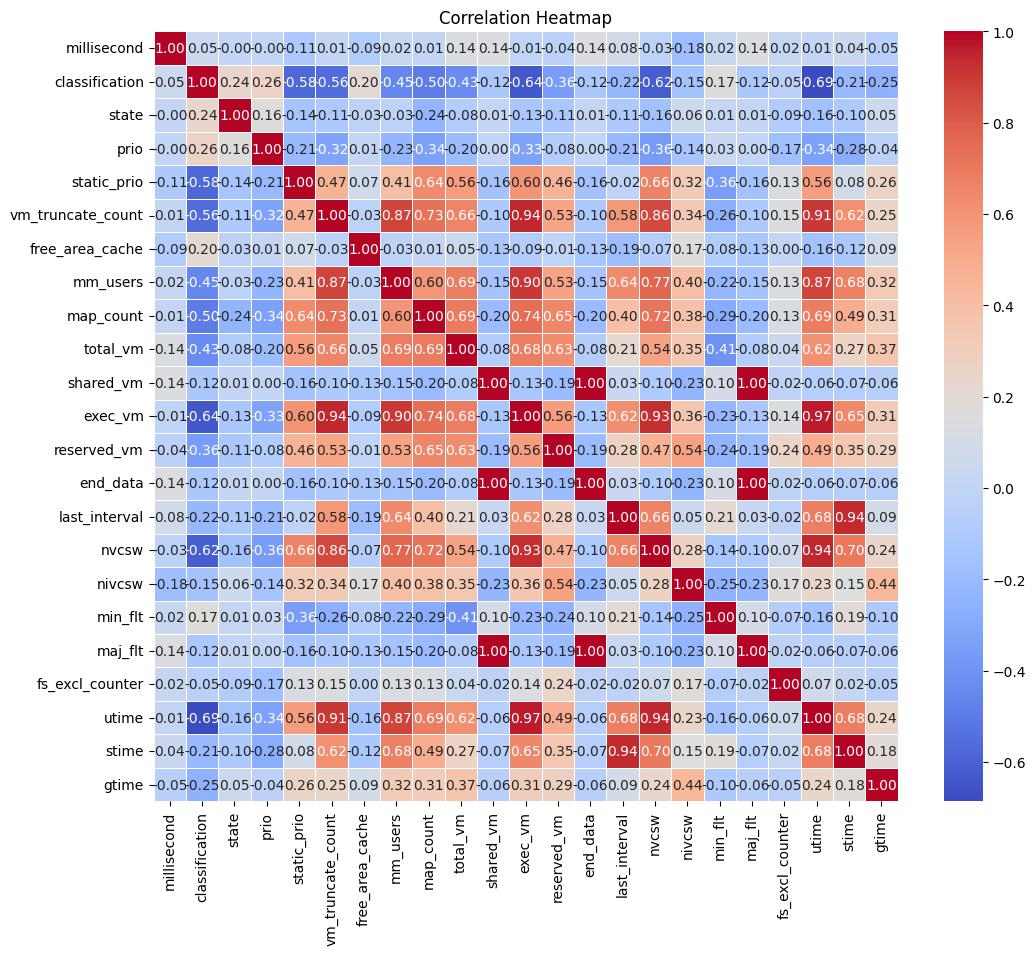

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

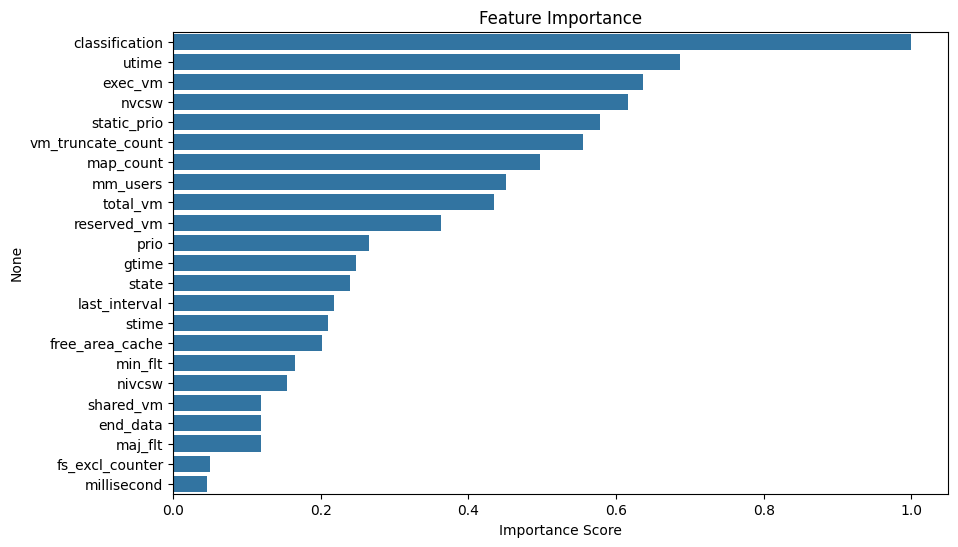

In [ ]:
# Compute feature importance scores (e.g., correlation)
feature_importance = df.corr()['classification'].abs().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()


**Feature Selection**

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j])) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.6)
len(set(corr_features))

11

In [ ]:
corr_features

{'end_data',
 'exec_vm',
 'last_interval',
 'maj_flt',
 'map_count',
 'mm_users',
 'nvcsw',
 'reserved_vm',
 'stime',
 'total_vm',
 'utime'}

In [ ]:
to_drop=['end_data',
 'exec_vm',
 'maj_flt',
 'map_count',
 'mm_users',
 'nvcsw',
 'reserved_vm',
 'shared_vm',
 'stime',
 'total_vm',
 'utime']

In [ ]:
df.drop(to_drop,axis=1,inplace=True)
df

millisecond  classification  state        prio  static_prio  \
1000             0               0      0  3069403136        16447   
1001             1               0      0  3069403136        16447   
1002             2               0      0  3069403136        16447   
1003             3               0      0  3069403136        16447   
1004             4               0      0  3069403136        16447   
...            ...             ...    ...         ...          ...   
99995          995               1   4096  3070148608        13988   
99996          996               1   4096  3070148608        13988   
99997          997               1   4096  3070148608        13988   
99998          998               1   4096  3070148608        13988   
99999          999               1   4096  3070148608        13988   

       vm_truncate_count  free_area_cache  last_interval  nivcsw  min_flt  \
1000               14739                0           3475       0        1   
1001               14739                0           3475       0        1   
1002               14739                0           3475       0        1   
1003               14739                0           3475       0        1   
1004               14739                0           3475       0        1   
...                  ...              ...            ...     ...      ...   
99995              10406                0              0       2        1   
99996              10406                0              0       2        1   
99997              10406                0              0       2        1   
99998              10406                0              0       2        1   
99999              10406                0              0       2        1   

       fs_excl_counter  gtime  
1000                 0      0  
1001                 0      0  
1002                 0      0  
1003                 0      0  
1004                 0      0  
...                ...    ...  
99995                0      0  
99996                0      0  
99997                0      0  
99998                0      0  
99999                0      0  

[35126 rows x 12 columns]

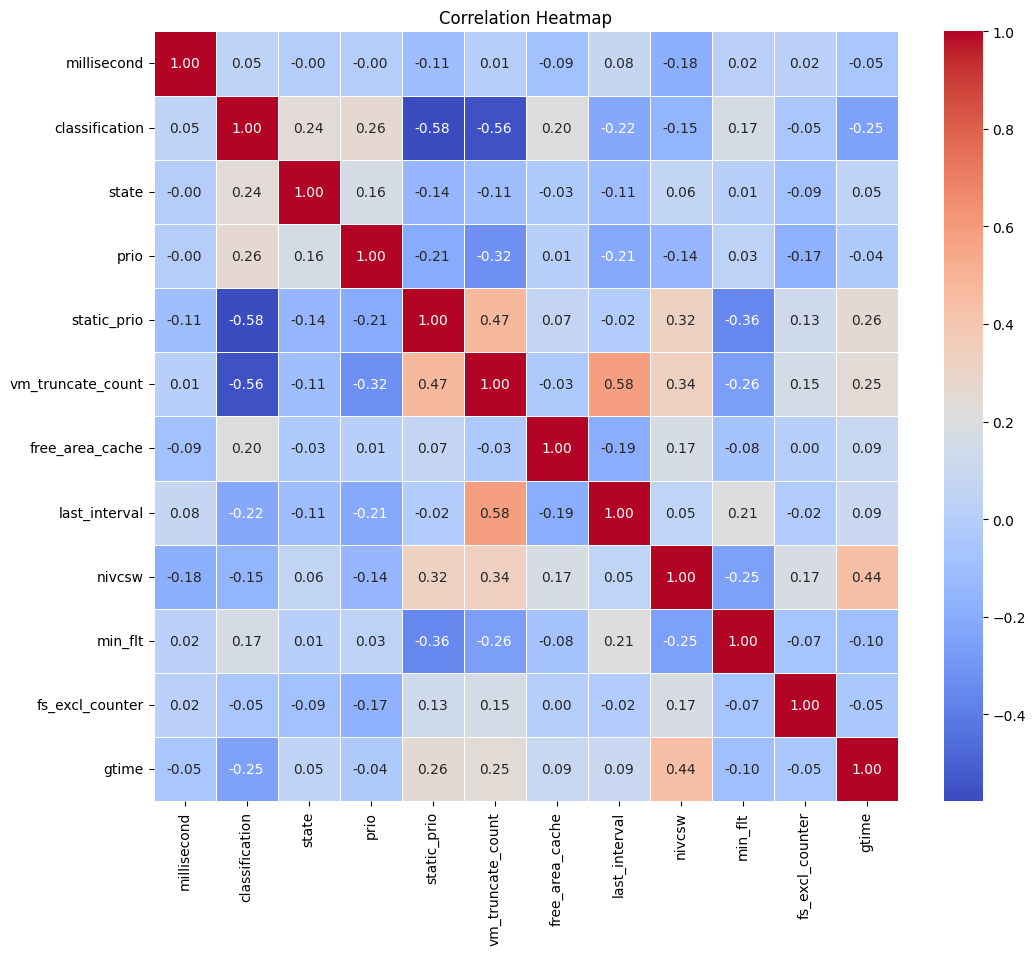

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='classification', ylabel='count'>

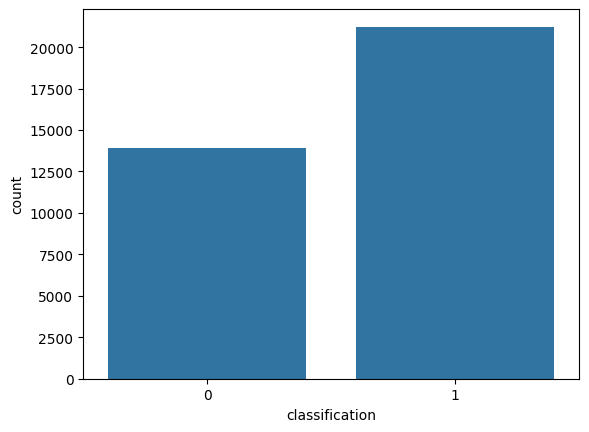

In [ ]:
sns.countplot(x='classification',data=df)

In [ ]:
df['classification'].value_counts()

classification
1    21231
0    13895
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35126 entries, 1000 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   millisecond        35126 non-null  int64
 1   classification     35126 non-null  int64
 2   state              35126 non-null  int64
 3   prio               35126 non-null  int64
 4   static_prio        35126 non-null  int64
 5   vm_truncate_count  35126 non-null  int64
 6   free_area_cache    35126 non-null  int64
 7   last_interval      35126 non-null  int64
 8   nivcsw             35126 non-null  int64
 9   min_flt            35126 non-null  int64
 10  fs_excl_counter    35126 non-null  int64
 11  gtime              35126 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB


# **Model Creation**

In [ ]:
x=df.drop(['classification'],axis=1).values
y=df['classification'].values

In [ ]:
print(x.ndim)
print(y.ndim)

2
1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight


# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Initialize classifiers
classifiers = {
    'BernoulliNB': BernoulliNB(),
    'SVM': SVC(class_weight=class_weights, probability=True),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(class_weight=class_weights),
    'RandomForest': RandomForestClassifier(class_weight=class_weights)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")


Classifier: BernoulliNB
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      4156
           1       0.74      0.82      0.78      6382

    accuracy                           0.71     10538
   macro avg       0.70      0.69      0.69     10538
weighted avg       0.71      0.71      0.71     10538



Classifier: SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4156
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     10538
   macro avg       1.00      1.00      1.00     10538
weighted avg       1.00      1.00      1.00     10538



Classifier: KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4156
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     10538
   macro avg       1.00      1.00      1.00     10538
weighted avg  

In [ ]:
df.to_csv('output.csv', index=False)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Define classifiers and their parameter grids
classifiers = {
    'BernoulliNB': (BernoulliNB(), {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False],
    'binarize': [0.0, 0.1, 0.5, 1.0]}),
    'SVM': (SVC(probability=True), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    'DecisionTree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    })
}

# Perform cross-validation and hyperparameter tuning
for name, (clf, params) in classifiers.items():
    print(f"Training {name}...")

    # Use SMOTE to balance the training data
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(clf, params, cv=cv, scoring='f1', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("\n")


Training BernoulliNB...
Best Parameters for BernoulliNB: {'alpha': 0.1, 'binarize': 0.1, 'fit_prior': True}
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      4156
           1       0.93      0.85      0.89      6382

    accuracy                           0.87     10538
   macro avg       0.86      0.87      0.87     10538
weighted avg       0.88      0.87      0.87     10538



Training SVM...
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4156
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     10538
   macro avg       1.00      1.00      1.00     10538
weighted avg       1.00      1.00      1.00     10538



Training KNN...
Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score 

**Since all other showing perfect scores it likely to be overfitted i am going with Bernouli**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
final_model=BernoulliNB(alpha=0.1,binarize=0.1,fit_prior=True)



In [ ]:
final_model.fit(x_resampled,y_resampled)


BernoulliNB(alpha=0.1, binarize=0.1)

In [ ]:
y_pred=final_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


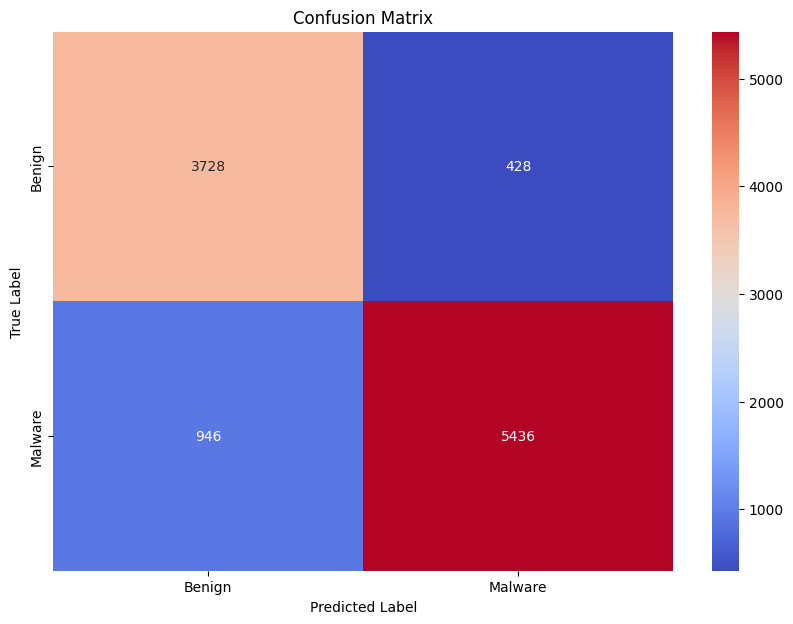

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84      4156
           1       0.93      0.85      0.89      6382

    accuracy                           0.87     10538
   macro avg       0.86      0.87      0.87     10538
weighted avg       0.88      0.87      0.87     10538



In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))


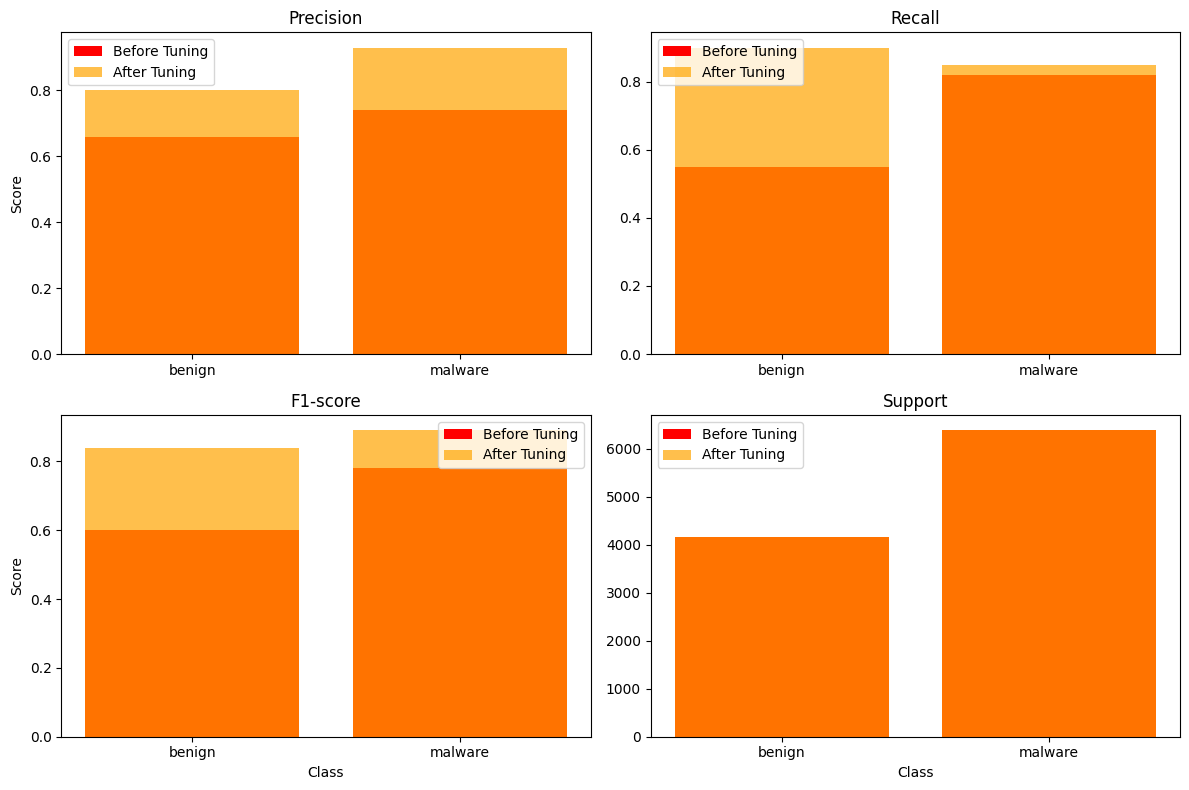

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names
classes = ['benign', 'malware']  # Replace with your actual class names

# Define classification report parameters before and after tuning for each class
precision_before = [0.66, 0.74]  # Precision before tuning for each class
recall_before = [0.55, 0.82]     # Recall before tuning for each class
f1_score_before = [0.60, 0.78]    # F1-score before tuning for each class
support_before = [4156, 6382]       # Support before tuning for each class

precision_after = [0.80, 0.93]    # Precision after tuning for each class
recall_after = [0.90, 0.85]       # Recall after tuning for each class
f1_score_after = [0.84, 0.89]     # F1-score after tuning for each class
support_after = [4156, 6382]        # Support after tuning for each class

# Create subplots for precision, recall, F1-score, and support
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot precision
axs[0, 0].bar(classes, precision_before, color='red', label='Before Tuning')
axs[0, 0].bar(classes, precision_after, color='orange', label='After Tuning', alpha=0.7)
axs[0, 0].set_title('Precision')
axs[0, 0].set_ylabel('Score')
axs[0, 0].legend()

# Plot recall
axs[0, 1].bar(classes, recall_before, color='red', label='Before Tuning')
axs[0, 1].bar(classes, recall_after, color='orange', label='After Tuning', alpha=0.7)
axs[0, 1].set_title('Recall')
axs[0, 1].legend()

# Plot F1-score
axs[1, 0].bar(classes, f1_score_before, color='red', label='Before Tuning')
axs[1, 0].bar(classes, f1_score_after, color='orange', label='After Tuning', alpha=0.7)
axs[1, 0].set_title('F1-score')
axs[1, 0].set_xlabel('Class')
axs[1, 0].set_ylabel('Score')
axs[1, 0].legend()

# Plot support
axs[1, 1].bar(classes, support_before, color='red', label='Before Tuning')
axs[1, 1].bar(classes, support_after, color='orange', label='After Tuning', alpha=0.7)
axs[1, 1].set_title('Support')
axs[1, 1].set_xlabel('Class')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


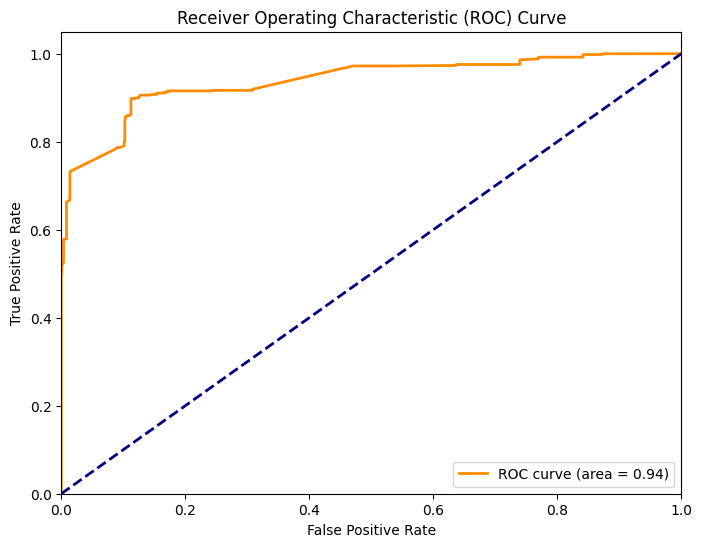

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = final_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()

# Define AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=bernoulli_nb)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'base_estimator__alpha': [0.1, 0.5, 1.0],
    'n_estimators': [5,10,20,50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],

    'base_estimator__fit_prior': [True, False],
    'base_estimator__binarize': [0.0, 0.1, 0.5, 1.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use best parameters to create final model
final_model = AdaBoostClassifier(base_estimator=BernoulliNB(alpha=best_params['base_estimator__alpha'],
                                                           fit_prior=best_params['base_estimator__fit_prior'],
                                                           binarize=best_params['base_estimator__binarize']),
                                 n_estimators=best_params['n_estimators'],
                                 learning_rate=best_params['learning_rate'])
# Train final model on full resampled training set
final_model.fit(X_train_resampled, y_train_resampled)

# Evaluate final model on test set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'base_estimator__alpha': 0.1, 'base_estimator__binarize': 0.0, 'base_estimator__fit_prior': True, 'learning_rate': 0.5, 'n_estimators': 200}
Test Accuracy: 0.7393243499715316
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      4156
           1       0.79      0.77      0.78      6382

    accuracy                           0.74     10538
   macro avg       0.73      0.73      0.73     10538
weighted avg       0.74      0.74      0.74     10538



In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Resample the training set
# oversampler = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define base models with hyperparameters around the best found values
base_learners = [
    ('nb1', BernoulliNB(alpha=0.1, binarize=0.1, fit_prior=True)),
    ('nb2', BernoulliNB(alpha=0.1, binarize=0.0, fit_prior=True)),
    ('nb3', BernoulliNB(alpha=0.05, binarize=0.1, fit_prior=True)),
    ('nb4', BernoulliNB(alpha=0.1, binarize=0.2, fit_prior=True)),
    ('nb5', BernoulliNB(alpha=0.2, binarize=0.1, fit_prior=True))
]

# Define stacking ensemble with Logistic Regression as the final estimator
stacking_ensemble = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression()
)

# Train the stacking ensemble
stacking_ensemble.fit(X_train_resampled, y_train_resampled)

# Evaluate final model on test set
y_pred = stacking_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7363826152970203
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      4156
           1       0.79      0.77      0.78      6382

    accuracy                           0.74     10538
   macro avg       0.72      0.73      0.73     10538
weighted avg       0.74      0.74      0.74     10538



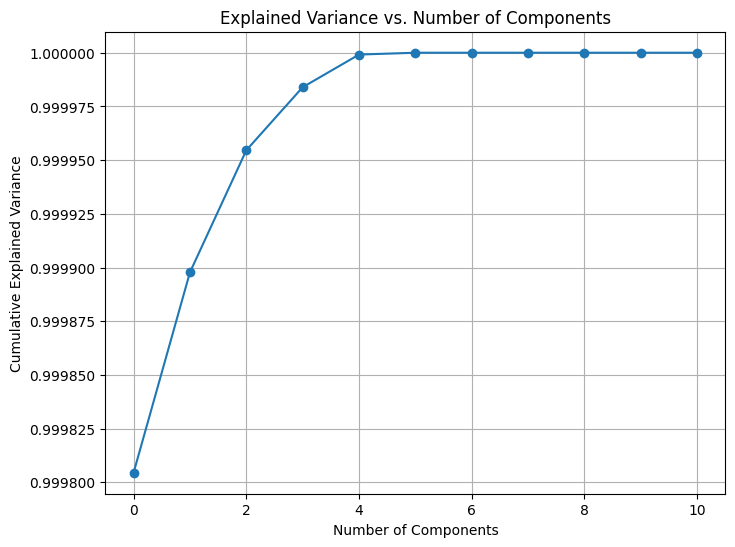

Number of components explaining 95% variance: 1


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA on the training data
pca = PCA().fit(X_train_resampled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Determine the number of components needed to explain 95% of the variance
best_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components explaining 95% variance: {best_n_components}')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB

# Define the best parameters from tuning
best_alpha = 0.1
best_binarize = 0.1
best_fit_prior = True

# Create the pipeline with PCA and BernoulliNB
pipeline = Pipeline([
    ('pca', PCA(n_components=1)),
    ('bernoulli_nb', BernoulliNB(alpha=best_alpha, binarize=best_binarize, fit_prior=best_fit_prior))
])

# Train the final model on the full resampled training set
pipeline.fit(X_train_resampled, y_train_resampled)

# Evaluate the final model on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.6743215031315241
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      4156
           1       0.76      0.67      0.71      6382

    accuracy                           0.67     10538
   macro avg       0.67      0.68      0.67     10538
weighted avg       0.69      0.67      0.68     10538

